In [1660]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline

In [1661]:
import cufflinks as cf;
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot; 

In [1662]:
init_notebook_mode(connected = True);

In [1663]:
import chart_studio.plotly as py;
import datetime;

In [1005]:
cf.go_offline();

In [1006]:
fatal_enc = pd.read_csv('fatal_encounters_dot_org.csv');

In [1007]:
death_arrests = pd.read_csv('deaths_arrests.csv');

In [1008]:
death_police = pd.read_csv('police_deaths_538.csv');

In [1009]:
death_pol_killings = pd.read_csv('police_killings_MPV.csv');

C:\Users\Shahbaz\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning:

Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.



In [1010]:
wash_post_shoot_stats = pd.read_csv('shootings_wash_post.csv');

In [1011]:
fatal_enc.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,01/01/2000,27898-27804 US-101,...,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,01/01/2000,Davison Freeway,...,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,01/01/2000,600 W Cherry Ln,...,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,01/02/2000,5700 block Mack Road,...,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [1012]:
death_arrests.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3


In [1013]:
death_police.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [1014]:
death_pol_killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name withheld by police,61,Male,Unknown race,NaN,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name withheld by police,22,Male,Unknown race,NaN,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Steven D. Smith,33,Male,Unknown race,NaN,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1015]:
wash_post_shoot_stats.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Exploratory Data Analysis

### For dataset 1: Police deaths. Dataframe_name: death_police 

In [1016]:
death_police.columns

Index(['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'year',
       'canine', 'dept_name', 'state'],
      dtype='object')

In [1017]:
death_police.describe()

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


In [1018]:
death_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB


In [1019]:
death_police.isnull().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

<AxesSubplot:>

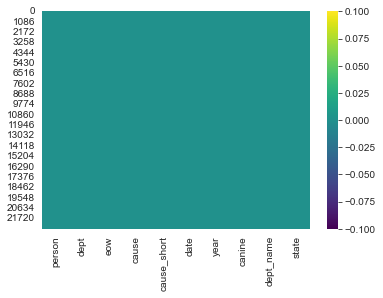

In [1020]:
sns.heatmap(death_police.isnull(), cmap = 'viridis')

to simplify this analysis, I am going to reference this dataset with variable <strong>df</strong> for now; this variable name will be reassigned to other datasets later on

In [1021]:
df = death_police.copy(deep = True);

In [1022]:
for i in df.columns:
    print('Column', i, ': \n', df[i].value_counts(), '\n');

Column person : 
 K9 Rocky                                4
K9 King                                 3
K9 Bruno                                3
K9 Sarge                                3
K9 Roscoe                               3
                                       ..
Game Warden Harvey M. Carter            1
Detective Sergeant John F. Mickley      1
Deputy Game Warden John W. Hollowell    1
Deputy Game Warden Joseph Saunders      1
K9 Credo                                1
Name: person, Length: 22742, dtype: int64 

Column dept : 
 New York City Police Department, NY                                         753
Chicago Police Department, IL                                               492
Puerto Rico Police Department, PR                                           338
United States Department of Justice - United States Marshals Service, US    279
Philadelphia Police Department, PA                                          256
                                                            

In [1023]:
for i in df.columns:
    print('Column', i, ': \n', df[i].nunique(), '\n');

Column person : 
 22742 

Column dept : 
 6528 

Column eow : 
 17158 

Column cause : 
 36 

Column cause_short : 
 36 

Column date : 
 17158 

Column year : 
 202 

Column canine : 
 2 

Column dept_name : 
 5525 

Column state : 
 60 



In [1024]:
death_police_post_EDA = df.copy(deep = True);

### For dataset 2: Police Killings, Dataframe_name: death_pol_killings

Similar to earlier, I am going to reference the death_pol_killings dataframe as <strong>df</strong> here temporarily for the sake of simplicity.

In [1025]:
df = death_pol_killings.copy(deep = True);

In [1026]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

In [1027]:
df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8422    Suburban
8423       Urban
8424       Urban
8425       Urban
8426    Suburban
Name: Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ), Length: 8427, dtype: object

<AxesSubplot:>

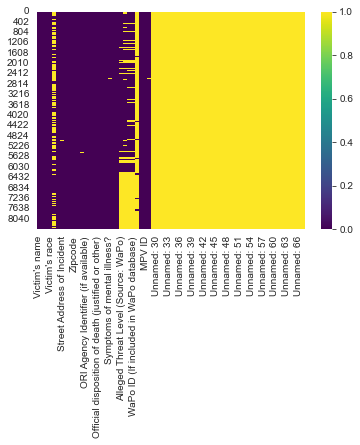

In [1028]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [1029]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).columns

Index(['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

<AxesSubplot:>

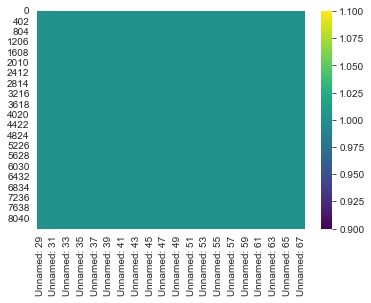

In [1030]:
sns.heatmap(df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).isnull(), cmap = 'viridis')

In [1031]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).isnull().sum()

Unnamed: 29    8427
Unnamed: 30    8427
Unnamed: 31    8427
Unnamed: 32    8427
Unnamed: 33    8427
Unnamed: 34    8427
Unnamed: 35    8427
Unnamed: 36    8427
Unnamed: 37    8427
Unnamed: 38    8427
Unnamed: 39    8427
Unnamed: 40    8427
Unnamed: 41    8427
Unnamed: 42    8427
Unnamed: 43    8427
Unnamed: 44    8427
Unnamed: 45    8427
Unnamed: 46    8427
Unnamed: 47    8427
Unnamed: 48    8427
Unnamed: 49    8427
Unnamed: 50    8427
Unnamed: 51    8427
Unnamed: 52    8427
Unnamed: 53    8427
Unnamed: 54    8427
Unnamed: 55    8427
Unnamed: 56    8427
Unnamed: 57    8427
Unnamed: 58    8427
Unnamed: 59    8427
Unnamed: 60    8427
Unnamed: 61    8427
Unnamed: 62    8427
Unnamed: 63    8427
Unnamed: 64    8427
Unnamed: 65    8427
Unnamed: 66    8427
Unnamed: 67    8427
dtype: int64

In [1032]:
df.drop (columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race",
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'MPV ID', 'Fatal Encounters ID',]).columns

Index(['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'],
      dtype='object')

In [1033]:
df.drop(columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True);

In [1034]:
print(death_pol_killings.columns)
'''
death_pol_killings.drop (columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',
       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True)
       '''

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-co

"\ndeath_pol_killings.drop (columns = ['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',\n       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',\n       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',\n       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',\n       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',\n       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',\n       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',\n       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',\n       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64',\n       'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67'], inplace = True)\n       "

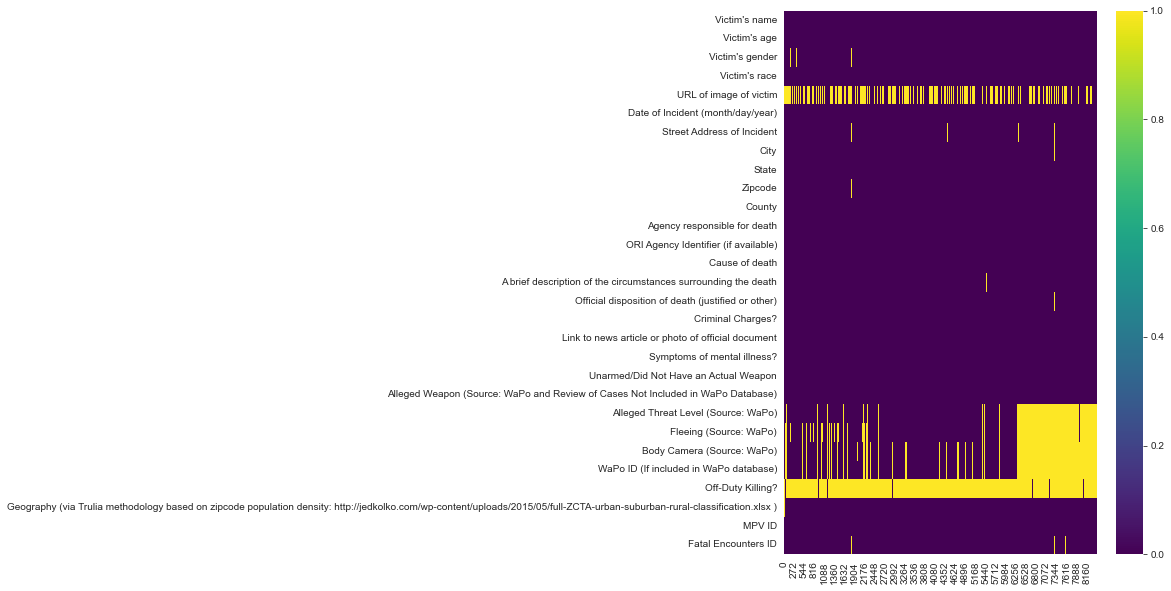

In [1035]:
plt.figure(figsize = (7, 10));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [1036]:
for i in df.columns:
    print('Column', i, 'null Values: \n', df[i].isnull().sum(), '\n');

Column Victim's name null Values: 
 0 

Column Victim's age null Values: 
 0 

Column Victim's gender null Values: 
 12 

Column Victim's race null Values: 
 0 

Column URL of image of victim null Values: 
 3888 

Column Date of Incident (month/day/year) null Values: 
 0 

Column Street Address of Incident null Values: 
 87 

Column City null Values: 
 6 

Column State null Values: 
 0 

Column Zipcode null Values: 
 36 

Column County null Values: 
 14 

Column Agency responsible for death null Values: 
 15 

Column ORI Agency Identifier (if available) null Values: 
 1 

Column Cause of death null Values: 
 0 

Column A brief description of the circumstances surrounding the death null Values: 
 17 

Column Official disposition of death (justified or other) null Values: 
 11 

Column Criminal Charges? null Values: 
 0 

Column Link to news article or photo of official document null Values: 
 11 

Column Symptoms of mental illness? null Values: 
 9 

Column Unarmed/Did Not Have an Actua

In [1037]:
for i in df.columns:
    print('Column', i, ': \n', df[i].value_counts(), '\n');

Column Victim's name : 
 Name withheld by police    258
Michael Brown                3
Robert Edwards               3
Christopher Anderson         2
Andrew Thomas                2
                          ... 
Benjamin Gregware            1
Mark Daniels                 1
Raymond Bishop               1
Ronell Foster                1
Andrew Layton                1
Name: Victim's name, Length: 8129, dtype: int64 

Column Victim's age : 
 25         278
31         273
Unknown    271
28         264
32         264
          ... 
10           1
95           1
93           1
7            1
107          1
Name: Victim's age, Length: 87, dtype: int64 

Column Victim's gender : 
 Male           7981
Female          421
Transgender       9
Unknown           4
Name: Victim's gender, dtype: int64 

Column Victim's race : 
 White               3711
Black               2121
Hispanic            1456
Unknown race         845
Asian                130
Native American      118
Pacific Islander      46
Nam

<strong>NOTE:</strong> 
- mental illness column: has 3 different values for 'unknown' due to case sensitivity and typos
- Off-Duty Killing? column: 3 values for off-duty due to case sensitivity

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



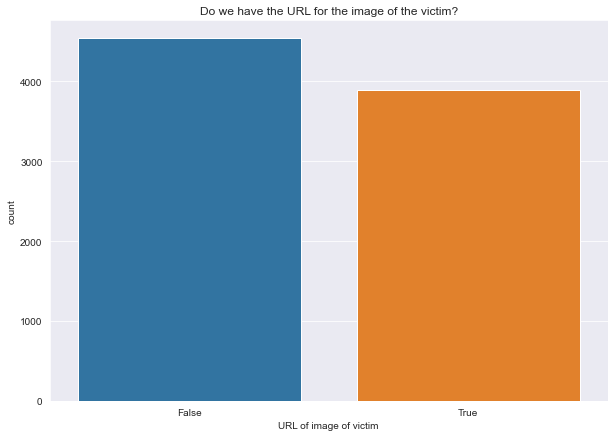

In [1038]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['URL of image of victim'].isnull());
plt.title('Do we have the URL for the image of the victim?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



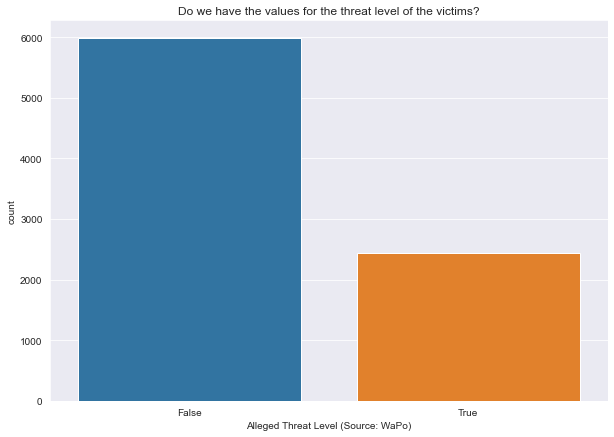

In [1039]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['Alleged Threat Level (Source: WaPo)'].isnull());
plt.title('Do we have the values for the threat level of the victims?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



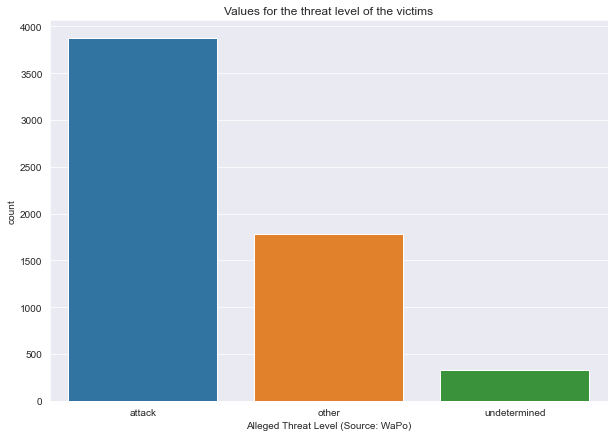

In [1040]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['Alleged Threat Level (Source: WaPo)']);
plt.title('Values for the threat level of the victims');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



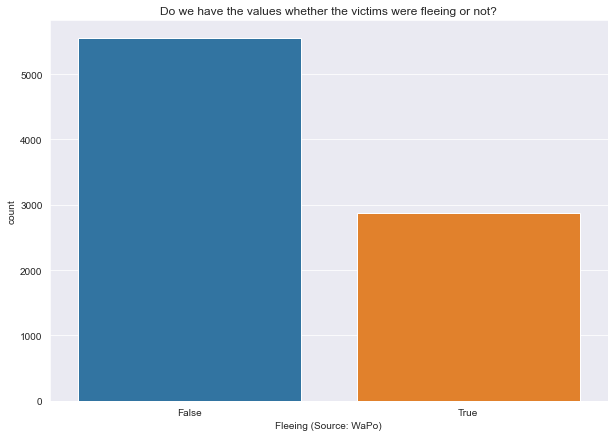

In [1041]:
sns.set_style('darkgrid');
plt.figure(figsize = (10, 7));
sns.countplot(df['Fleeing (Source: WaPo)'].isnull());
plt.title('Do we have the values whether the victims were fleeing or not?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



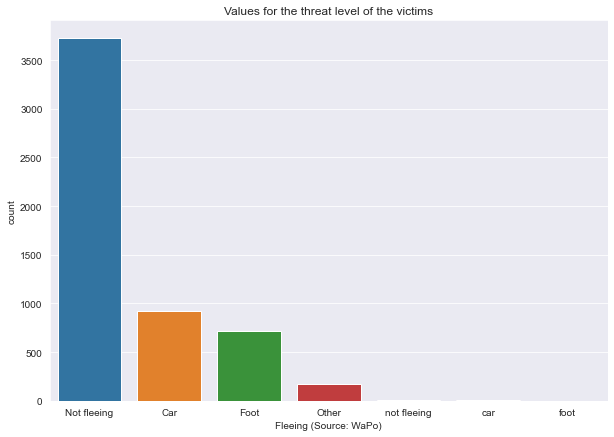

In [1042]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Fleeing (Source: WaPo)']);
plt.title('Values for the threat level of the victims');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



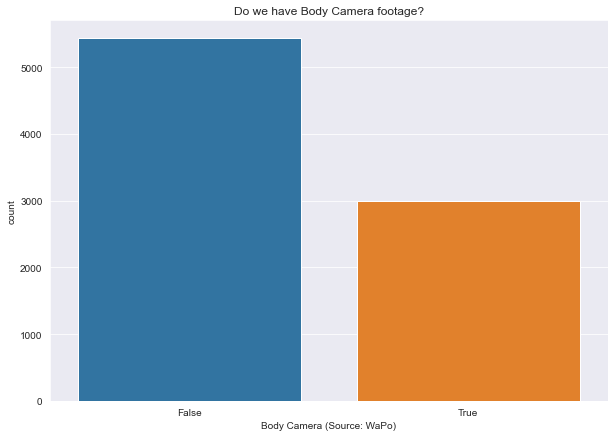

In [1043]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Body Camera (Source: WaPo)'].isnull());
plt.title('Do we have Body Camera footage?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



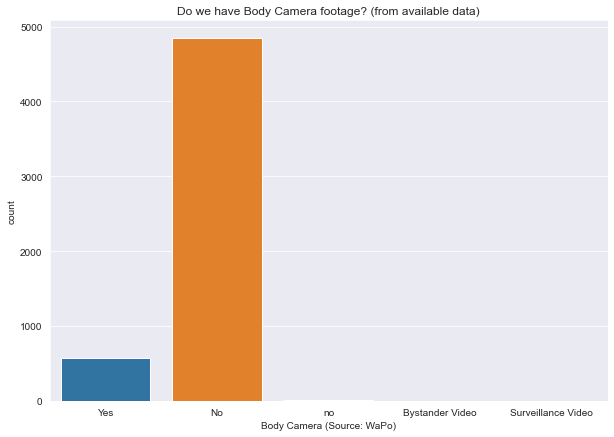

In [1044]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Body Camera (Source: WaPo)']);
plt.title('Do we have Body Camera footage? (from available data)');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



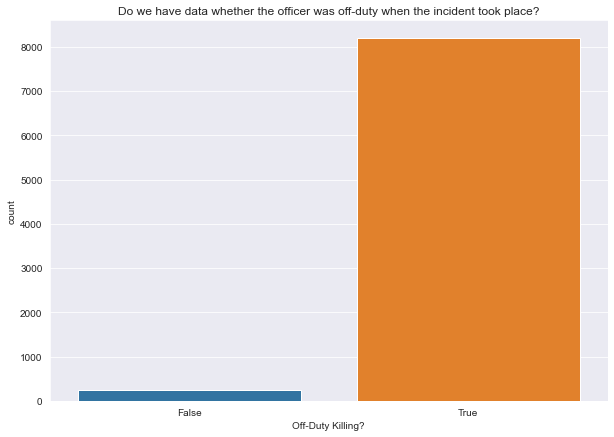

In [1045]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Off-Duty Killing?'].isnull());
plt.title('Do we have data whether the officer was off-duty when the incident took place?');

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



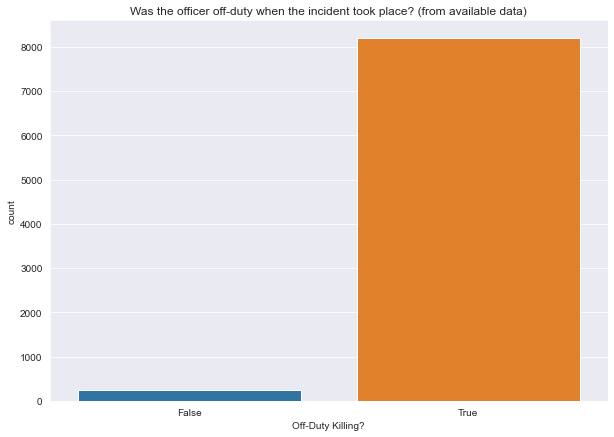

In [1046]:
plt.figure(figsize = (10, 7));
sns.countplot(df['Off-Duty Killing?'].isnull());
plt.title('Was the officer off-duty when the incident took place? (from available data)');

In [1047]:
# storing values in case they were changed
death_pol_killings_post_EDA = df.copy(deep = True); 

### For dataset 3: Deaths while arresting , Dataframe_name: death_arrests

In [1048]:
# assigning df to this dataframe to avoid redundacy of code and minimize time spent typing
df = death_arrests.copy(deep = True);

In [1049]:
df.columns

Index(['State', 'City', 'PD',
       'Black People Killed by Police (1/1/2013-12/31/2019)',
       'Hispanic People Killed by Police (1/1/2013-12/31/2019)',
       'Native American People Killed by Police (1/1/2013-12/31/2019)',
       'Asian People Killed by Police (1/1/2013-12/31/2019)',
       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)',
       'White People Killed by Police (1/1/2013-12/31/2019)',
       'Unknown Race People Killed by Police (1/1/2013-12/31/2019)',
       'All People Killed by Police (1/1/2013-12/31/2019)', 'Total', 'Black',
       'White', 'Amer. Indian', 'Asian', 'Hawaiian', 'Asian/Pacific Islander',
       'Other', 'Two or\nmore races', 'Hispanic',
       'Black-White Dissimilarity Index (2010)',
       'Murder and\nnonnegligent manslaughter', 'Murder Rate',
       'Avg Annual Police Homicide Rate',
       'Avg Annual Police Homicide Rate for Black People',
       'Avg Annual Police Homicide Rate for White People',
       'Avg Annual Police Homici

In [1050]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 46 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          102 non-null    object 
 1   City                                                           103 non-null    object 
 2   PD                                                             102 non-null    object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            93 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         71 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  12 non-null     float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            33 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)    

In [1051]:
df.describe()

,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),All People Killed by Police (1/1/2013-12/31/2019),Black-White Dissimilarity Index (2010),Murder Rate,...,Violent crimes 2018 (if reported by agency),Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Killings by Police per 10k Arrests
count,93.000000,71.000000,12.000000,33.000000,9.000000,91.000000,50.000000,102.000000,100.00000,102.000000,...,97.000000,101.000000,101.000000,90.000000,92.000000,89.000000,92.000000,93.000000,95.000000,97.000000
mean,37.365591,31.915493,12.416667,6.424242,8.222222,49.153846,18.100000,113.274510,47.76680,13.638235,...,9898.288660,9348.536634,7.634653,27957.544444,25761.358696,23460.112360,22174.391304,21038.204301,20181.936842,10.827835
std,215.977444,166.629850,31.445359,21.824628,13.772961,361.190991,91.754831,775.775807,16.05875,18.787125,...,48695.427594,46419.666991,4.098669,44370.996328,42520.616931,37502.979738,34130.809754,31475.686249,27941.657750,6.626945
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,17.24000,0.000000,...,160.000000,143.000000,0.700000,2742.000000,2500.000000,2566.000000,2422.000000,2405.000000,2064.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.000000,34.61500,3.400000,...,1636.000000,1539.000000,4.500000,9634.500000,9020.000000,8954.000000,9106.500000,7925.000000,7836.500000,6.700000
50%,5.000000,3.000000,2.000000,1.000000,1.000000,4.000000,2.000000,13.000000,49.84000,6.600000,...,2953.000000,2754.600000,7.100000,17526.000000,16247.500000,15019.000000,13816.500000,13247.000000,13303.000000,9.500000
75%,10.000000,8.500000,3.250000,2.000000,10.000000,9.000000,4.000000,24.750000,58.69000,15.725000,...,5480.000000,5335.300000,10.100000,30561.250000,27520.500000,25723.000000,24121.250000,23632.000000,21461.500000,13.000000
max,1957.000000,1338.000000,111.000000,120.000000,42.000000,3417.000000,641.000000,7626.000000,82.48000,104.100000,...,480067.000000,466620.500000,18.900000,393809.000000,387727.000000,339470.000000,314864.000000,286225.000000,246773.000000,39.700000


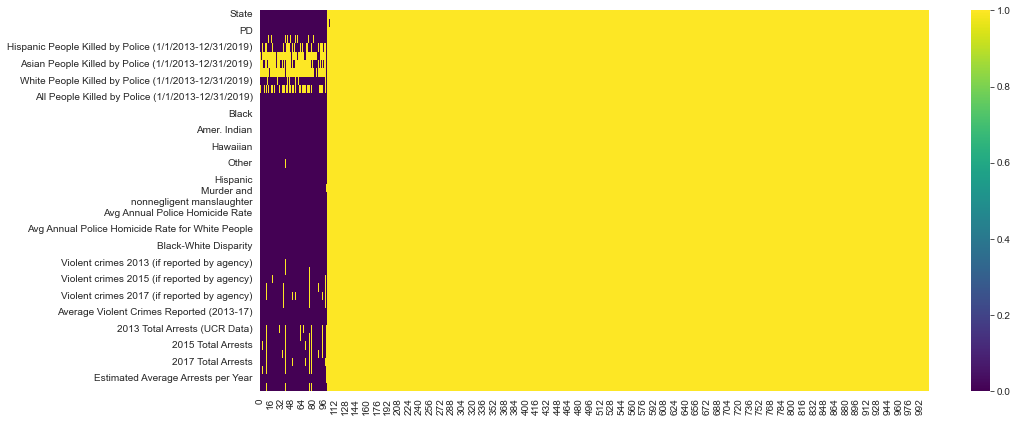

In [1052]:
plt.figure(figsize = (15, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [1053]:
df.isnull().sum()

State                                                            904
City                                                             903
PD                                                               904
Black People Killed by Police (1/1/2013-12/31/2019)              913
Hispanic People Killed by Police (1/1/2013-12/31/2019)           935
Native American People Killed by Police (1/1/2013-12/31/2019)    994
Asian People Killed by Police (1/1/2013-12/31/2019)              973
Pacific Islanders Killed by Police (1/1/2013-12/31/2019)         997
White People Killed by Police (1/1/2013-12/31/2019)              915
Unknown Race People Killed by Police (1/1/2013-12/31/2019)       956
All People Killed by Police (1/1/2013-12/31/2019)                904
Total                                                            904
Black                                                            904
White                                                            904
Amer. Indian                      

In [1054]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].value_counts(), '\n');

Column:  State
California              17
Texas                   13
Florida                  6
Arizona                  6
North Carolina           5
Nevada                   4
Ohio                     4
Virginia                 3
New York                 3
Colorado                 3
Nebraska                 2
Wisconsin                2
Tennessee                2
Oklahoma                 2
Kentucky                 2
Pennsylvania             2
Missouri                 2
New Jersey               2
Washington               2
Indiana                  2
United States            2
Louisiana                2
Hawaii                   1
Michigan                 1
District of Columbia     1
Illinois                 1
Massachusetts            1
Alabama                  1
Minneapolis              1
Maryland                 1
Georgia                  1
Oregon                   1
Alaska                   1
Minnesota                1
Kansas                   1
New Mexico               1
Name: State, 

In [1055]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].nunique());
    print(df[x].unique(), '\n');

Column:  State
36
['New Mexico' 'California' 'Alaska' 'Texas' 'Georgia' 'Colorado'
 'Maryland' 'Louisiana' 'Alabama' 'Massachusetts' 'New York' 'Arizona'
 'North Carolina' 'Virginia' 'Illinois' 'Ohio' 'District of Columbia'
 'Michigan' 'Indiana' 'Nevada' 'Florida' 'Hawaii' 'New Jersey' 'Missouri'
 'Kentucky' 'Nebraska' 'Wisconsin' 'Tennessee' 'Minneapolis' 'Oklahoma'
 'Pennsylvania' 'Oregon' 'Washington' 'Minnesota' 'Kansas' 'United States'
 nan] 

Column:  City
103
['Albuquerque' 'Anaheim' 'Anchorage' 'Arlington' 'Atlanta' 'Aurora'
 'Austin' 'Bakersfield' 'Baltimore' 'Baton Rouge' 'Birmingham' 'Boston'
 'Buffalo' 'Chandler' 'Charlotte' 'Chesapeake' 'Chicago' 'Chula Vista'
 'Cincinnati' 'Cleveland' 'Colorado Springs' 'Columbus' 'Corpus Christi'
 'Dallas' 'Washington' 'Denver' 'Detroit' 'Durham' 'El Paso' 'Fort Wayne'
 'Fort Worth' 'Fremont' 'Fresno' 'Garland' 'Glendale' 'Greensboro'
 'Henderson' 'Hialeah' 'Honolulu' 'Houston' 'Indianapolis' 'Irvine'
 'Irving' 'Jacksonville' 'Jersey Cit

<strong>NOTE: </strong> There are a lot of missing values in this dataframe. Will need to keep this in mind while data wrangling/imputation

In [1056]:
death_arrests_post_EDA = df.copy(deep = True);

### For dataset 4: Fatal Encounters, Dataframe_name: fatal_enc

In [1057]:
# assigning df to this dataframe to avoid redundacy of code and minimize time spent typing
df = fatal_enc.copy(deep = True);

In [1058]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unique ID                                                       28621 non-null  float64
 1   Subject's name                                                  28622 non-null  object 
 2   Subject's age                                                   27608 non-null  object 
 3   Subject's gender                                                28521 non-null  object 
 4   Subject's race                                                  28621 non-null  object 
 5   Subject's race with imputations                                 28448 non-null  object 
 6   Imputation probability                                          28439 non-null  object 
 7   URL of image of deceased                         

In [1059]:
df.describe()

,Unique ID,Location of death (zip code),Latitude,Longitude,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28621.000000,28432.000000,28621.000000,28621.000000,2.000000,28621.000000,28622.000000
mean,14311.000000,58432.535488,36.767127,-95.441638,28059.000000,14311.000000,2011.190972
std,8262.315364,27982.930895,5.160217,16.339723,794.788022,8262.315364,5.837947
min,1.000000,1013.000000,19.034681,-165.591880,27497.000000,1.000000,2000.000000
25%,7156.000000,33159.250000,33.542220,-111.278099,27778.000000,7156.000000,2006.000000
50%,14311.000000,60660.500000,36.692833,-90.556579,28059.000000,14311.000000,2012.000000
75%,21466.000000,85044.000000,40.426677,-82.576535,28340.000000,21466.000000,2016.000000
max,28621.000000,99921.000000,71.301250,-67.266033,28621.000000,28621.000000,2100.000000


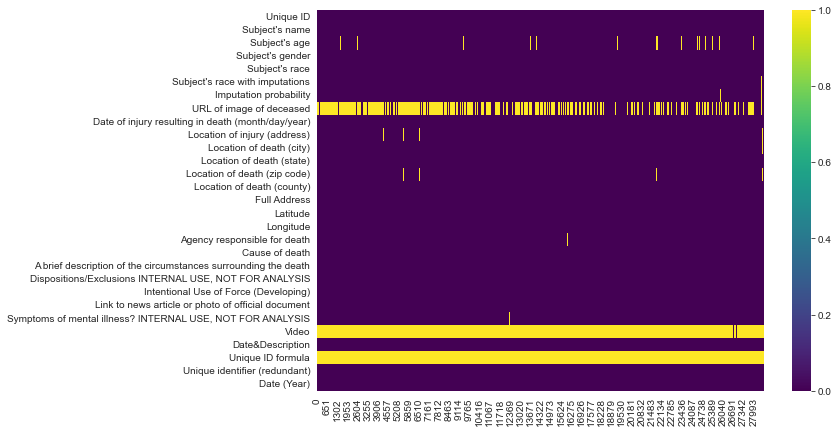

In [1060]:
plt.figure(figsize = (10, 7));
sns.heatmap (df.isnull().transpose(), cmap = 'viridis');

In [1061]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].value_counts(), '\n');

Column:  Unique ID
25746.0    1
15940.0    1
15951.0    1
15950.0    1
15949.0    1
          ..
7594.0     1
7593.0     1
7592.0     1
7591.0     1
28621.0    1
Name: Unique ID, Length: 28621, dtype: int64 

Column:  Subject's name
Name withheld by police                       1173
Michael Johnson                                  7
John Doe 2                                       4
William Smith                                    4
Michael Moore                                    4
                                              ... 
Nathan Paul Sanderson                            1
Shawn Matthew Roe                                1
Leroy Henderson                                  1
Dane Johnson                                     1
This is a spacer for Fatal Encounters use.       1
Name: Subject's name, Length: 27219, dtype: int64 

Column:  Subject's age
22           920
25           896
24           864
27           851
23           849
            ... 
8 months       1
18 months   

In [1062]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].nunique());
    print(df[x].unique(), '\n');

Column:  Unique ID
28621
[25746. 25747. 25748. ... 28616. 28621.    nan] 

Column:  Subject's name
27219
['Samuel H. Knapp' 'Mark A. Horton' 'Phillip A. Blurbridge' ... 'Reuben'
 'Danny Ray Spence' 'This is a spacer for Fatal Encounters use.'] 

Column:  Subject's age
118
['17' '21' '19' '23' '24' '53' '30' '29' '55' '42' '41' '45' '20' '25'
 '22' '31' '36' '28' '35' nan '26' '68' '16' '49' '27' '50' '44' '43' '38'
 '34' '32' '14' '15' '18' '33' '57' '1' '88' '37' '40' '85' '48' '56' '52'
 '46' '63' '74' '60' '59' '51' '69' '10' '13' '39' '47' '66' '79' '12'
 '11' '54' '65' '75' '20s' '6' '7' '5' '3' '72' '58' '71' '80' '78' '61'
 '73' '67' '70' '77' '76' '8' '9' '64' '62' '4' '83' '2' '89' '60s'
 '18-25' '18 months' '46/53' '3 months' '40s' '30s' '84' '90' '50s' '81'
 '87' '6 months' '9 months' '10 months' '86' '92' '2 months' '7 months'
 '82' '8 months' '91' '3 days' '55.' '20s-30s' '95' '101' '107' '40-50'
 '97' '93' '4 months' '70s'] 

Column:  Subject's gender
3
['Male' 'Female' n

In [1063]:
fatal_enc_post_EDA = df.copy(deep = True);

<strong>NOTE: </strong> This is the largest dataset we have in all of this

### For dataset 5: Washington Post Data, Dataframe_name: wash_post_shoot_stats

In [1064]:
# assigning df to this dataframe to avoid redundacy of code and minimize time spent typing
df = wash_post_shoot_stats.copy(deep = True);

In [1065]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5552 non-null   int64  
 1   name                     5552 non-null   object 
 2   date                     5552 non-null   object 
 3   manner_of_death          5552 non-null   object 
 4   armed                    5339 non-null   object 
 5   age                      5307 non-null   float64
 6   gender                   5551 non-null   object 
 7   race                     4966 non-null   object 
 8   city                     5552 non-null   object 
 9   state                    5552 non-null   object 
 10  signs_of_mental_illness  5552 non-null   bool   
 11  threat_level             5552 non-null   object 
 12  flee                     5290 non-null   object 
 13  body_camera              5552 non-null   bool   
dtypes: bool(2), float64(1), 

In [1066]:
df.describe()

,id,age
count,5552.000000,5307.000000
mean,3084.888689,37.121726
std,1739.209618,13.112530
min,3.000000,6.000000
25%,1581.750000,27.000000
50%,3087.500000,35.000000
75%,4603.250000,46.000000
max,6075.000000,91.000000


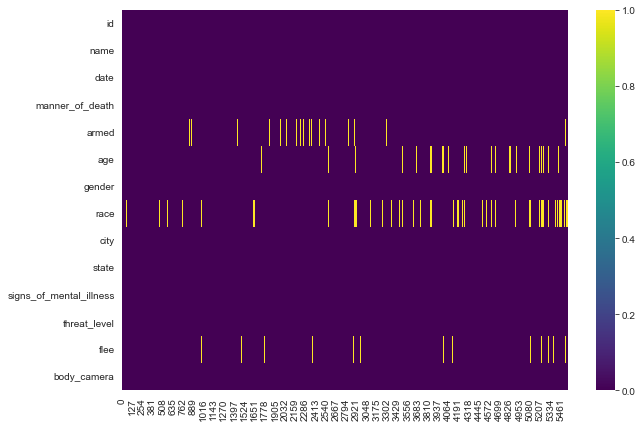

In [1067]:
plt.figure(figsize = (10, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [1068]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].value_counts(), '\n');

Column:  id
3       1
4065    1
4060    1
4059    1
4067    1
       ..
2062    1
2055    1
2053    1
2058    1
6045    1
Name: id, Length: 5552, dtype: int64 

Column:  name
TK TK                    200
Michael Johnson            3
Robert Martinez            2
Brandon Jones              2
David Willoughby           2
                        ... 
Jun Wang                   1
Jason King                 1
Jay Johannes Holmgren      1
Edwin Amaya Maldonado      1
Jeffrey Hubbard            1
Name: name, Length: 5337, dtype: int64 

Column:  date
2018-02-01    9
2018-06-29    9
2018-04-01    9
2018-01-06    9
2020-05-26    9
             ..
2016-07-20    1
2017-11-20    1
2016-07-22    1
2019-09-22    1
2017-10-18    1
Name: date, Length: 1902, dtype: int64 

Column:  manner_of_death
shot                5275
shot and Tasered     277
Name: manner_of_death, dtype: int64 

Column:  armed
gun                        3146
knife                       818
unarmed                     355
toy weapon

In [1069]:
for x in df.columns: 
    print ('Column: ', x);
    print(df[x].nunique());
    print(df[x].unique(), '\n');

Column:  id
5552
[   3    4    5 ... 6043 6044 6045] 

Column:  name
5337
['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Thomas Moles'
 'Jose Manuel Castro' 'Jeffrey Hubbard'] 

Column:  date
1902
['2015-01-02' '2015-01-03' '2015-01-04' ... '2020-08-14' '2020-08-15'
 '2020-08-16'] 

Column:  manner_of_death
2
['shot' 'shot and Tasered'] 

Column:  armed
94
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'metal pole' 'Taser'
 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' 'carjack' 'chain' "contractor's level"
 'unknown weapon' 'stapler' 'beer bottle' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe'

In [1070]:
wash_post_shoot_stats_post_EDA = df.copy(deep =True);

<strong>Note: </strong>Most complete dataset we have here.

## Data Wrangling/Imputations and notes

### For dataset 1: Police deaths. Dataframe_name: death_police 

In [1350]:
# for the sake of simplicity, assigning the post_EDA dataframe to 'df'
df = death_police_post_EDA.copy(deep=True);

In [1351]:
df.columns

Index(['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'year',
       'canine', 'dept_name', 'state'],
      dtype='object')

<AxesSubplot:>

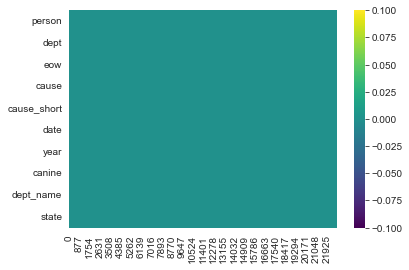

In [1349]:
sns.heatmap(df.isnull().transpose(), cmap = 'viridis')
plt.title('')

It is very interesting to note that despite being such a huge dataset, we have no values that are null here. It may be indicative of how no stone was left unturned in investigating and documenting the death of state agents. It could also stem from the close proximity of the state agents to homicidal data collection agencies, departments and institutions. This would result in an ease of solving and logging incidents of this nature for record keeping by the government

In [1073]:
df['person'].value_counts()

K9 Rocky                                4
K9 King                                 3
K9 Bruno                                3
K9 Sarge                                3
K9 Roscoe                               3
                                       ..
Game Warden Harvey M. Carter            1
Detective Sergeant John F. Mickley      1
Deputy Game Warden John W. Hollowell    1
Deputy Game Warden Joseph Saunders      1
K9 Credo                                1
Name: person, Length: 22742, dtype: int64

In [1074]:
df[df['person'].apply(lambda x: x.split(' ')[0]) == 'K9']

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
12736,K9 Baron,"Virginia State Police, VA","EOW: Wednesday, September 12, 1962",Cause of Death: Assault,Assault,1962-09-12,1962,True,Virginia State Police,VA
13332,K9 Apache,"Chattanooga Police Department, TN","EOW: Tuesday, March 29, 1966",Cause of Death: Automobile accident,Automobile accident,1966-03-29,1966,True,Chattanooga Police Department,TN
14644,K9 King,"Augusta County Sheriff's Office, VA","EOW: Saturday, June 3, 1972",Cause of Death: Gunfire,Gunfire,1972-06-03,1972,True,Augusta County Sheriff's Office,VA
15202,K9 Woo,"Tucson Police Department, AZ","EOW: Saturday, November 23, 1974",Cause of Death: Struck by vehicle,Struck by vehicle,1974-11-23,1974,True,Tucson Police Department,AZ
15448,K9 Fritz,"Pittsburgh Police Department, PA","EOW: Monday, April 28, 1975",Cause of Death: Fall,Fall,1975-04-28,1975,True,Pittsburgh Police Department,PA
...,...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Cause of Death: Accidental,Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Cause of Death: Gunfire (Accidental),Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


In [1075]:
df[df['person'].apply(lambda x: x.split(' ')[0]) == 'K9']['cause_short'].value_counts()

Gunfire                 82
Heat exhaustion         47
Struck by vehicle       35
Stabbed                 18
Fall                    14
Automobile accident     14
Gunfire (Accidental)    11
Vehicular assault        6
Drowned                  6
Assault                  5
Duty related illness     5
Animal related           5
Training accident        3
Accidental               2
Asphyxiation             2
Exposure to toxins       2
Poisoned                 2
Fire                     2
Terrorist attack         1
Unidentified             1
Struck by train          1
Name: cause_short, dtype: int64

In [1076]:
df[df['person'].apply(lambda x: x.split(' ')[0]) != 'K9']

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...,...
22772,Sergeant Stacey Allen Baumgartner,"Patton Village Police Department, TX","EOW: Sunday, June 19, 2016",Cause of Death: Vehicle pursuit,Vehicle pursuit,2016-06-19,2016,False,Patton Village Police Department,TX
22773,"Deputy Sheriff David Francis Michel, Jr.","Jefferson Parish Sheriff's Office, LA","EOW: Wednesday, June 22, 2016",Cause of Death: Gunfire,Gunfire,2016-06-22,2016,False,Jefferson Parish Sheriff's Office,LA
22774,Officer Bradley Wayne Treat,United States Department of Agriculture - Fore...,"EOW: Wednesday, June 29, 2016",Cause of Death: Animal related,Animal related,2016-06-29,2016,False,United States Department of Agriculture - Fore...,US
22775,"Deputy Sheriff Martin Tase Sturgill, II","Humphreys County Sheriff's Office, TN","EOW: Thursday, June 30, 2016",Cause of Death: Heart attack,Heart attack,2016-06-30,2016,False,Humphreys County Sheriff's Office,TN


In [1077]:
df[df['person'].apply(lambda x: x.split(' ')[0]) != 'K9']['cause_short'].value_counts()

Gunfire                     11985
Automobile accident          2334
Motorcycle accident          1134
Heart attack                  977
Vehicular assault             882
Struck by vehicle             833
Vehicle pursuit               627
Assault                       608
Gunfire (Accidental)          593
Stabbed                       447
Aircraft accident             381
Drowned                       256
Struck by train               253
Fall                          183
Duty related illness          164
9/11 related illness          110
Terrorist attack               84
Electrocuted                   83
Accidental                     78
Animal related                 77
Struck by streetcar            68
Fire                           61
Explosion                      58
Bomb                           57
Exposure to toxins             42
Weather/Natural disaster       33
Training accident              25
Structure collapse             23
Train accident                 18
Exposure      

### For dataset 2: Police Killings, Dataframe_name: death_pol_killings

In [1078]:
df = death_pol_killings_post_EDA.copy(deep = True);

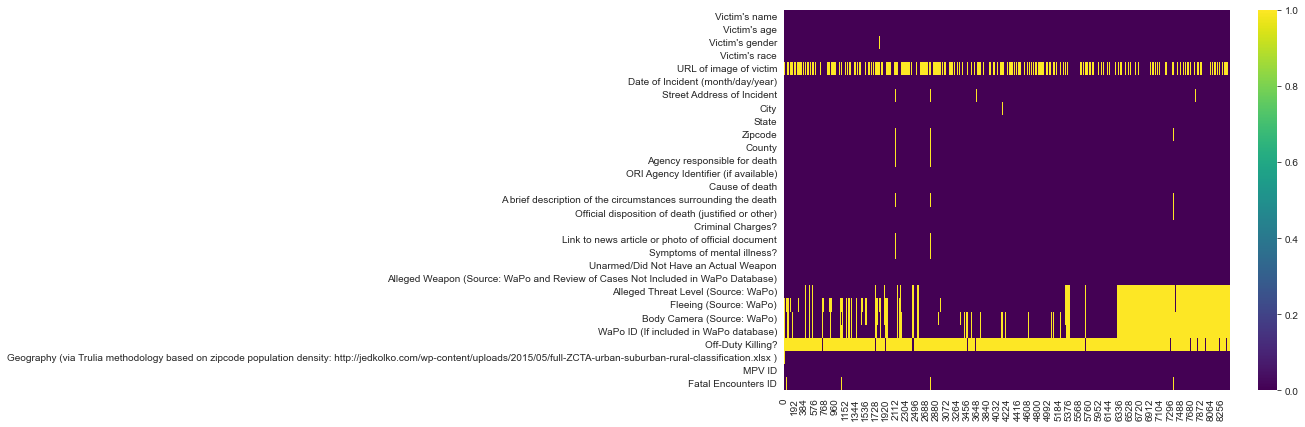

In [1079]:
plt.figure(figsize = (10, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [1080]:
df['Victim\'s name'].value_counts()

Name withheld by police    258
Michael Brown                3
Robert Edwards               3
Christopher Anderson         2
Andrew Thomas                2
                          ... 
Benjamin Gregware            1
Mark Daniels                 1
Raymond Bishop               1
Ronell Foster                1
Andrew Layton                1
Name: Victim's name, Length: 8129, dtype: int64

In [1081]:
df[df['Victim\'s age'] == 'Unknown']

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,Unknown,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8448,28737.0
1,Name withheld by police,Unknown,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,Allegedly Armed,knife,attack,Not fleeing,NaN,NaN,NaN,NaN,8446,28734.0
8,Name withheld by police,Unknown,Male,Unknown race,NaN,03/09/2020,CA-14 and Redrock Randsburg Rd,Bakersfield,CA,93519.0,...,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,8443,28725.0
19,Kurt Phelps,Unknown,Male,Unknown race,NaN,29/08/2020,1200 M 3/4 Road,Loma,CO,81524.0,...,Allegedly Armed,gun,other,Not fleeing,No,6118.0,NaN,Rural,8430,28697.0
29,Name withheld by police,Unknown,NaN,Unknown race,NaN,24/08/2020,Florence and Beverly Hills Ave NE,Albuquerque,NM,87113.0,...,Allegedly Armed,gun,attack,NaN,No,6109.0,NaN,Urban,8420,28657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,Name withheld by police,Unknown,Male,Unknown race,NaN,22/05/2013,5600 Wyalusing Avenue,Philadelphia,PA,19131.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,426,12824.0
8056,Name withheld by police,Unknown,Male,Unknown race,NaN,08/05/2013,N.W. 59 Street & N.W. 35 Avenue,Miami,FL,33142.0,...,Unclear,undetermined,NaN,NaN,NaN,NaN,NaN,Urban,378,12757.0
8065,Name withheld by police,Unknown,Male,Unknown race,NaN,04/05/2013,Northwest 114th Street and 27th Avenue,Miami,FL,33167.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,367,12743.0
8114,Michael Everett Morgan,Unknown,Male,Unknown race,NaN,22/04/2013,1170 W. State Road 434,Longwood,FL,32750.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,317,12681.0


In [1082]:
df['Victim\'s age'].unique()

array(['Unknown', '61', '22', '33', '38', '48', '53', '18', '50', '58',
       '36', '29', '26', '25', '43', '44', '17', '30', '31', '41', '47',
       '39', '35', '42', '37', '21', '60', '27', '34', '32', '52', '28',
       '40', '45', '51', '55', '67', '63', '56', '73', '49', '24', '59',
       '23', '20', '62', '70', '57', '68', '19', '81', '65', '46', '69',
       '64', '54', '16', '66', '82', '83', '75', '15', '76', '74', '77',
       '80', '14', '71', '6', '78', '72', '84', '89', '1', '40s', '79',
       '91', '13', '86', '10', '12', '95', '5', '93', '7', '107', '87'],
      dtype=object)

Since a we have some non-null unknown values, I shall first of all cast them as null, then convert the age values into integer/numerical values and then replace them with the mean value if there aren't a lot of outliers, or the standard deviation if there are a lot of outliers

In [1083]:
df['Victim\'s age'].dropna().value_counts().index

Index(['25', '31', 'Unknown', '28', '32', '27', '34', '33', '30', '26', '35',
       '29', '24', '37', '36', '23', '22', '38', '21', '39', '40', '41', '42',
       '43', '45', '20', '49', '44', '47', '50', '18', '19', '46', '48', '51',
       '52', '53', '54', '55', '56', '59', '17', '57', '58', '61', '62', '60',
       '16', '63', '64', '65', '67', '66', '68', '69', '15', '70', '73', '71',
       '76', '72', '74', '75', '14', '78', '77', '83', '84', '80', '86', '1',
       '5', '81', '6', '82', '89', '13', '12', '87', '40s', '79', '91', '10',
       '95', '93', '7', '107'],
      dtype='object')

In [1084]:
df['Victim\'s age'].replace(to_replace= '40s', value = '45', inplace = True);

In [1085]:
def age_bar_filter(x):
    #print(x, "\n");
    if np.isnan(x):
        return x;
    else:
        return int(x);

In [1086]:
#df['Victim\'s age'] = df['Victim\'s age'].apply(lambda x: x if np.isnull(x) else int(x));
#df['Victim\'s age'].apply(lambda x: age_bar_filter(x));
#age_bar_filter('22')
df[df['Victim\'s age'] != 'Unknown']['Victim\'s age'].apply(lambda x: int(x)).describe()

#df[df['Victim\'s age'] != 'Unknown']['Victim\'s age'] = df[df['Victim\'s age'] != 'Unknown']['Victim\'s age'].apply(lambda x: int(x))

count    8156.000000
mean       36.828347
std        13.145415
min         1.000000
25%        27.000000
50%        35.000000
75%        45.000000
max       107.000000
Name: Victim's age, dtype: float64

So we can clearly see that the mean and standard deviation are about the same. This means there aren't a lot of outliers when it comes to the Victim's age. I shall now replace the 'Unknown' values with the mean values.

In [1087]:
df['Victim\'s age'].replace(to_replace='Unknown', value = '37', inplace = True);


In [1088]:
df['Victim\'s age'] = df['Victim\'s age'].apply(lambda x : int (x));

In [1089]:
df['Victim\'s gender'].value_counts()

Male           7981
Female          421
Transgender       9
Unknown           4
Name: Victim's gender, dtype: int64

Since the male gender is the overwhelming majority here, I shall assume that the Unknown values are Male and replace them as that.

<strong>UPDATE:</strong> Dropping nulls but keeping unknowns since it's a bit strange to have them both; Unknowns might be indicative in this case.

In [1090]:
#df['Victim\'s gender'].replace(to_replace= 'Male', value='Unknown', inplace = True);
#df = df.drop(index = df[df['Victim\'s gender'] == 'Unknown'].index);
#df[df['Victim\'s gender'] == 'Unknown']

In [1091]:
df['Victim\'s gender'].isnull().sum()

12

In [1092]:
df = df.drop(df[df['Victim\'s gender'].isnull()].index);

In [1093]:
df['Victim\'s gender'].isnull().sum()

0

In [1094]:
df['Victim\'s name'].value_counts()

Name withheld by police    250
Michael Brown                3
Robert Edwards               3
Michael Johnson              2
Andrew Thomas                2
                          ... 
Michael Weber                1
Sidney T. Richardson IV      1
Benjamin Gregware            1
Mark Daniels                 1
Andrew Layton                1
Name: Victim's name, Length: 8126, dtype: int64

In [1095]:
df[df['Victim\'s name'] == 'Unknown']

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID


In [1096]:
# Checking for 'John Doe'; commonly used for unidentified bodies
df[df['Victim\'s name'].apply(lambda x : (x.split()[0][0] == 'J') and (x.split()[0][1] == 'o') and (x.split()[0][2] == 'h') and (x.split()[0][3] == 'n') and (x.split()[1][0] == 'D'))]

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
636,John Daniel Dixon,75,Male,White,NaN,20/02/2020,1300 Balsam Drive,Decatur,GA,30033.0,...,Allegedly Armed,gun,other,Not fleeing,No,5557.0,NaN,Suburban,7813,27579.0
1274,John David Brown,53,Male,White,https://fatalencounters.org/wp-content/uploads...,22/07/2019,83 River Rd,Ranburne,AL,36273.0,...,Allegedly Armed,gun,attack,Not fleeing,No,4893.0,NaN,Rural,7171,26328.0
1551,John Duane Fairbanks,40,Male,Native American,http://www.fatalencounters.org/wp-content/uplo...,18/04/2019,9900 Foley Blvd NW,Coon Rapids,MN,55433.0,...,Allegedly Armed,gun,attack,Foot,Yes,4637.0,NaN,Suburban,6895,25922.0
1579,John Darlington,57,Male,White,NaN,10/04/2019,800 N 15th St,Mexico Beach,FL,32456.0,...,Allegedly Armed,gun,other,Not fleeing,No,4661.0,NaN,Rural,6869,25886.0
1725,Johnathan D. Liddell,45,Male,Unknown race,NaN,17/02/2019,1100 Thornton Rd,Lithia Springs,GA,30122.0,...,Unarmed/Did Not Have an Actual Weapon,toy weapon,NaN,NaN,NaN,NaN,Off-Duty,Suburban,6723,25673.0
2027,John David Manning,29,Male,White,https://www.fatalencounters.org/wp-content/upl...,14/11/2018,489 W Main St,Spartanburg,SC,29301.0,...,Allegedly Armed,knife,attack,Not fleeing,No,4234.0,NaN,Suburban,6419,25092.0
3071,Johnathan David Crawford Melton,27,Male,White,NaN,17/12/2017,8593 Hiwassee St,Charleston,TN,37310.0,...,Unclear,unknown weapon,other,Foot,No,3216.0,NaN,Rural,5378,23473.0
3100,Johnny D. Carter,24,Male,Black,NaN,05/12/2017,3300 Philpott Dr,Bassett,VA,24055.0,...,Allegedly Armed,gun,attack,Not fleeing,No,3183.0,NaN,Rural,5347,23406.0
3559,John Donadio,51,Male,White,NaN,03/07/2017,12000 Colbarn Dr,Fishers,IN,46038.0,...,Allegedly Armed,gun,attack,Not fleeing,No,2732.0,NaN,Suburban,4888,20883.0
5644,John Dieringer,51,Male,White,NaN,05/08/2015,9050 W. Waterford Square,Greenfield,WI,53228.0,...,Allegedly Armed,knife,other,Not fleeing,No,704.0,NaN,Suburban,2805,16472.0


In [1097]:
# Checking for 'Jane Doe'; commonly used for unidentified bodies
df[df['Victim\'s name'].apply(lambda x : (x.split()[0][0] == 'J') and (x.split()[0][1] == 'a') and (x.split()[1][0] == 'D'))]

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
776,Jamarri Daiwon Tarver,26,Male,Black,NaN,02/01/2020,3655 W Craig Rd,North Las Vegas,NV,89032.0,...,Vehicle,vehicle,attack,Car,Yes,5349.0,NaN,Suburban,7675,27267.0
1346,Jack Daniel West,61,Male,White,NaN,29/06/2019,631 Boswell Crossing,Lantana,TX,76226.0,...,Allegedly Armed,gun,attack,NaN,No,4826.0,NaN,Suburban,7099,26245.0
1385,Jamarcus Dejun Moore,28,Male,Black,NaN,15/06/2019,3200 Allison-Bonnett Memorial Parkway,Hueytown,AL,35023.0,...,Allegedly Armed,gun,attack,Car,No,4794.0,NaN,Suburban,7057,26194.0
1397,Jaquan Derrick Diijon Thompson,27,Male,Black,NaN,11/06/2019,1200 N Broadway St,Poteau,OK,74953.0,...,Allegedly Armed,knife,attack,Not fleeing,No,4777.0,NaN,Rural,7044,26183.0
1492,James Douglas Meadows,45,Male,White,https://fatalencounters.org/wp-content/uploads...,13/05/2019,400 Little New York Rd,Rising Sun,MD,21911.0,...,Allegedly Armed,gun,attack,Not fleeing,No,4720.0,NaN,Suburban,6953,26032.0
1512,Jason Demarcus Larkin,37,Male,White,NaN,04/05/2019,South Ave I & County 19th St South,Gadsden,AZ,85336.0,...,Allegedly Armed,knife,attack,NaN,NaN,4708.0,NaN,Rural,6933,26483.0
1676,Jared D. Kelly,36,Male,Unknown race,NaN,05/03/2019,2524 S Campbell Ave,Springfield,MO,65807.0,...,Allegedly Armed,gun,other,NaN,No,4535.0,NaN,Urban,6766,25682.0
1828,Jahmal Derrick Stewart,45,Male,Black,https://www.fatalencounters.org/wp-content/upl...,14/01/2019,1480 N Beale Rd,Marysville,CA,95901.0,...,Allegedly Armed,gun,attack,Not fleeing,No,4370.0,NaN,Suburban,6615,25441.0
1996,Jarmane Dywane Logan,35,Male,Black,https://www.fatalencounters.org/wp-content/upl...,27/11/2018,NE Monroe St and NE Grant St,Topeka,KS,66608.0,...,Vehicle,vehicle,attack,Car,No,4210.0,NaN,Urban,6452,25136.0
2022,Jack Darrel Fields Jr.,25,Male,Black,https://www.fatalencounters.org/wp-content/upl...,15/11/2018,1116 Marks Church Rd,Augusta,GA,30909.0,...,Allegedly Armed,knife,attack,Not fleeing,No,4189.0,NaN,Urban,6422,25099.0


Since this is a name value and most of them have been withheld by the police, I will not be replacing it with anything else.

In [1098]:
df['Victim\'s race'].value_counts()

White               3709
Black               2120
Hispanic            1454
Unknown race         839
Asian                130
Native American      117
Pacific Islander      46
Name: Victim's race, dtype: int64

Since there is a large amount of Unknown race values, and assigning them to the most common value would skew the data by a large amount, I was considering getting rid of the Unknown race values altogether. However, this could be perceived as a bias in some ways. After discussing this matter with the professor, I have decided to keep this value intact as 'Unknown' since it is, in some ways, documenting a problem/highlighting it

In [1099]:
df['Victim\'s race']

0       Unknown race
1       Unknown race
2       Unknown race
3       Unknown race
4       Unknown race
            ...     
8422        Hispanic
8423        Hispanic
8424           Black
8425        Hispanic
8426           White
Name: Victim's race, Length: 8415, dtype: object

In [1100]:
df['Date of Incident (month/day/year)']

0       06/09/2020
1       05/09/2020
2       05/09/2020
3       05/09/2020
4       04/09/2020
           ...    
8422    01/01/2013
8423    01/01/2013
8424    01/01/2013
8425    01/01/2013
8426    01/01/2013
Name: Date of Incident (month/day/year), Length: 8415, dtype: object

In [1101]:
df['Date of Incident (day)'] = df['Date of Incident (month/day/year)'].apply(lambda x: int(x.split('/')[0]));
df['Date of Incident (month)'] = df['Date of Incident (month/day/year)'].apply(lambda x: int(x.split('/')[1]));
df['Date of Incident (year)'] = df['Date of Incident (month/day/year)'].apply(lambda x: int(x.split('/')[2]));
#df.apply(lambda x: datetime.datetime(x['Date of Incident (day)'], x['Date of Incident (month)'], x['Date of Incident (year)']))
#for i in range(0, len(df)):
#    df.iloc[i]
#df['Date of Incident (day)'].value_counts()
#df.iloc[0]['Date of Incident (day)']
#df['Date of Incident (month/day/year)'].apply(lambda x: datetime.datetime(int(x)))

In [1102]:
def create_date_obj(x):
    date_of_incident = [];
    for i in range(0, len(x)):
        temp = datetime.date(day = x.iloc[i]['Date of Incident (day)'], month = x.iloc[i]['Date of Incident (month)'], year = x.iloc[i]['Date of Incident (year)']);
        date_of_incident.append(temp);
    return date_of_incident;

In [1103]:
df['Date of incident (datetime)'] = create_date_obj(df);

I reorganized this data and typecast it as a datetime datatype as it makes looking up and categorizing data according to specific time-frames a lot easier.

In [1104]:
df['URL of image of victim'].isnull().sum()

3876

In [1105]:
df['Street Address of Incident'].isnull().sum()

84

Since assigning any other value for this missing data would not be the right and since there is not very large number of them, I will drop the missing values for the 'Street Address of Incident' column

In [1106]:
df = df.drop(df[df['Street Address of Incident'].isnull() == True].index);
df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Date of Incident (day),Date of Incident (month),Date of Incident (year),Date of incident (datetime)
0,Name withheld by police,37,Male,Unknown race,NaN,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,NaN,NaN,NaN,NaN,8448,28737.0,6,9,2020,2020-09-06
1,Name withheld by police,37,Male,Unknown race,NaN,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,NaN,NaN,NaN,NaN,8446,28734.0,5,9,2020,2020-09-05
2,Name withheld by police,61,Male,Unknown race,NaN,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,NaN,NaN,off-duty,NaN,8447,28735.0,5,9,2020,2020-09-05
3,Name withheld by police,22,Male,Unknown race,NaN,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,NaN,NaN,NaN,NaN,8449,28736.0,5,9,2020,2020-09-05
4,Steven D. Smith,33,Male,Unknown race,NaN,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,NaN,NaN,NaN,NaN,8444,28726.0,4,9,2020,2020-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,01/01/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,NaN,NaN,NaN,Suburban,4,12176.0,1,1,2013,2013-01-01
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,01/01/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,NaN,NaN,NaN,Urban,3,12174.0,1,1,2013,2013-01-01
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,01/01/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,NaN,NaN,NaN,Urban,2,12173.0,1,1,2013,2013-01-01
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,01/01/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,NaN,NaN,NaN,Urban,1,12175.0,1,1,2013,2013-01-01


In [1107]:
df['Street Address of Incident'].isnull().sum()

0

In [1108]:
df['City'].isnull().sum()

2

In [1109]:
df['City'].value_counts()

Phoenix         121
Los Angeles     121
Houston         108
Chicago          84
San Antonio      64
               ... 
Lenexa            1
Eaton Rapids      1
Tieton            1
Sells             1
Gordon            1
Name: City, Length: 3032, dtype: int64

In [1110]:
df = df.drop(df[df['City'].isnull() == True].index);

In [1111]:
df['City'].isnull().sum()

0

In [1112]:
df['State'].isnull().sum()

0

In [1113]:
df['State'].value_counts()

CA    1292
TX     770
FL     602
AZ     370
GA     291
CO     260
WA     236
NC     230
OK     229
OH     228
MO     220
TN     198
IL     189
PA     181
NY     173
LA     165
NM     151
AL     149
NV     142
MD     139
IN     138
VA     135
KY     132
MI     131
SC     129
OR     123
WI     122
MS     114
AR     114
NJ     113
UT      91
MN      89
KS      75
WV      69
MA      58
ID      52
IA      49
AK      44
MT      44
CT      40
NE      39
HI      38
ME      34
DC      27
WY      22
SD      22
DE      21
NH      18
ND      13
VT      12
RI       6
Name: State, dtype: int64

In [1114]:
df['Zipcode'].isnull().sum()

15

In [1115]:
df[df['Zipcode'] == 85009.0]

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Date of Incident (day),Date of Incident (month),Date of Incident (year),Date of incident (datetime)
1528,Alejandro Hernandez,26,Male,Hispanic,NaN,29/04/2019,40th Ave and Van Buren St,Phoenix,AZ,85009.0,...,No,4693.0,NaN,Urban,6919,25949.0,29,4,2019,2019-04-29
1653,Henry Wayne Rivera,30,Male,Hispanic,https://www.fatalencounters.org/wp-content/upl...,13/03/2019,19th Ave and Monroe St,Phoenix,AZ,85009.0,...,No,4570.0,NaN,Urban,6793,25710.0,13,3,2019,2019-03-13
1982,Miguel Angel Duran Delgado,46,Male,Hispanic,NaN,29/11/2018,N 35th Ave & W Thomas Rd,Phoenix,AZ,85009.0,...,No,4227.0,NaN,Urban,6459,25209.0,29,11,2018,2018-11-29
2245,Fabian Ortiz Adame,25,Male,White,NaN,27/08/2018,W Portland St & N 39th Ave,Phoenix,AZ,85009.0,...,No,3990.0,NaN,Urban,6198,24769.0,27,8,2018,2018-08-27
2733,Jose Aaron Gonzalez,44,Male,Hispanic,NaN,27/03/2018,W Roosevelt St & N 31st Ave,Phoenix,AZ,85009.0,...,No,3554.0,NaN,Urban,5712,23978.0,27,3,2018,2018-03-27
2855,Edward Hallinan,39,Male,Black,NaN,21/02/2018,N 35th Ave & Thomas Rd,Phoenix,AZ,85009.0,...,No,3430.0,NaN,Urban,5594,23800.0,21,2,2018,2018-02-21
4789,Francis Clark,43,Male,Native American,http://www.fatalencounters.org/wp-content/uplo...,14/05/2016,3737 West McDowell Road,Phoenix,AZ,85009.0,...,Yes,1537.0,NaN,Urban,3656,17664.0,14,5,2016,2016-05-14
5574,Shane Randolph,45,Male,White,NaN,25/08/2015,W McDowell Rd and N 35th Ave,Phoenix,AZ,85009.0,...,No,775.0,NaN,Urban,2871,16562.0,25,8,2015,2015-08-25
7394,Isaac Lankisch,42,Male,White,http://media.azfamily.com/images/12-7-13-ISAAC...,06/12/2013,2500 S 27th Ave,Phoenix,AZ,85009.0,...,NaN,NaN,NaN,Urban,1048,13796.0,6,12,2013,2013-12-06
8400,Vincent Jimenez,35,Male,Hispanic,http://ksaz.images.worldnow.com/images/2052982...,07/01/2013,29th Avenue and Madison,Phoenix,AZ,85009.0,...,NaN,NaN,NaN,Urban,29,12209.0,7,1,2013,2013-01-07


In [1116]:
df = df.drop(df[df['Zipcode'].isnull()].index);
#df['Zipcode'].isnull().sum()

In [1117]:
df['Zipcode'].isnull().sum()

0

In [1118]:
df['County'].isnull().sum()

1

In [1119]:
df['County'].value_counts()

Los Angeles    359
Maricopa       229
Harris         130
Jefferson      122
Orange         121
              ... 
Foard            1
Real             1
Warrick          1
Del Norte        1
Greenbrier       1
Name: County, Length: 1130, dtype: int64

<strong>FIX ME: </strong> The City(LA and Phoenix), Zipcode(Phoenix), State(California), County(Phoenix) data is flip-flopping a lot! choose which one to assign for the missing values!

Professor suggestions: Keep race columns, drop small missing data values, assign null values as another value which is indicative of a null but is machine processable

I have decided to drop the unknown geographical data values after discussing the issue with the professor

In [1120]:
df = df.drop(df[df['County'].isnull() == True].index);

In [1121]:
df['County'].isnull().sum()

0

In [1219]:
#plt.figure(figsize = (10, 7));
#sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [1123]:
df['URL of image of victim'].isnull().sum()

3814

In [1124]:
df[df['URL of image of victim'].isnull() == False]['URL of image of victim']

5       https://fatalencounters.org/wp-content/uploads...
6       https://fatalencounters.org/wp-content/uploads...
9       https://fatalencounters.org/wp-content/uploads...
10      https://fatalencounters.org/wp-content/uploads...
12      https://fatalencounters.org/wp-content/uploads...
                              ...                        
8422    http://www.krdo.com/image/view/-/17980228/medR...
8423    http://www.bakersfieldnow.com/news/local/A-26-...
8424    http://content.omaha.com/media/maps/ps/2013/ja...
8425    http://www.tricitytribuneusa.com/wp-content/up...
8426    http://bloximages.chicago2.vip.townnews.com/ma...
Name: URL of image of victim, Length: 4499, dtype: object

In [1125]:
temp_index = df[df['URL of image of victim'].isnull() == True].index;
temp_index

Int64Index([   0,    1,    2,    3,    4,    7,    8,   11,   15,   17,
            ...
            8384, 8385, 8394, 8402, 8409, 8414, 8415, 8416, 8417, 8420],
           dtype='int64', length=3814)

In [1126]:
#df.loc[temp_index[10], 'URL of image of victim'] = 'Unknown';
#df.loc[temp_index[10], 'URL of image of victim']
for i in temp_index:
        df.loc[i, 'URL of image of victim'] = 'Unknown';
        
#df[df['URL of image of victim'].isnull() == True].index
#df['URL of image of victim'].isnull().sum()

In [1127]:
#df[df['URL of image of victim'].isnull()]['URL of image of victim'] = 'Unknown'

In [1128]:
df['URL of image of victim'].isnull().sum()

0

In [1129]:
df['Alleged Threat Level (Source: WaPo)'].value_counts()

attack          3827
other           1756
undetermined     317
Name: Alleged Threat Level (Source: WaPo), dtype: int64

In [1130]:
df['Alleged Threat Level (Source: WaPo)'].isnull().sum()

2413

In [1132]:
temp_index = df[df['Alleged Threat Level (Source: WaPo)'].isnull() == True].index;
temp_index

Int64Index([   4,    6,    9,   14,   65,   84,   87,   89,   97,  100,
            ...
            8417, 8418, 8419, 8420, 8421, 8422, 8423, 8424, 8425, 8426],
           dtype='int64', length=2413)

In [1135]:
for i in temp_index:
    df.loc[i, 'Alleged Threat Level (Source: WaPo)'] = 'unknown';

In [1136]:
df['Alleged Threat Level (Source: WaPo)'].value_counts()

attack          3827
unknown         2413
other           1756
undetermined     317
Name: Alleged Threat Level (Source: WaPo), dtype: int64

In [1138]:
df['Fleeing (Source: WaPo)'].isnull().sum()

2841

In [1141]:
temp_index = df[df['Fleeing (Source: WaPo)'].isnull()].index;
temp_index

Int64Index([   4,    5,    6,    8,   10,   14,   16,   34,   35,   38,
            ...
            8417, 8418, 8419, 8420, 8421, 8422, 8423, 8424, 8425, 8426],
           dtype='int64', length=2841)

In [1142]:
# since I am doing the same thing multiple times and can't figure out how to do it with lambda f(x)
def replace_null_with_unknown (val , col_name):
    temp_index = val[val[col_name].isnull()].index;
    for i in temp_index:
        val.loc[i, col_name] = 'unknown';
    return val;

In [1144]:
df = replace_null_with_unknown(df, 'Fleeing (Source: WaPo)');

In [1145]:
df['Fleeing (Source: WaPo)'].isnull().sum()

0

In [1149]:
df['Fleeing (Source: WaPo)'] = df['Fleeing (Source: WaPo)'].apply(lambda x : x.lower());

In [1153]:
df['Body Camera (Source: WaPo)'].isnull().sum()

2952

In [1155]:
df = replace_null_with_unknown(df, 'Body Camera (Source: WaPo)');
df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Date of Incident (day),Date of Incident (month),Date of Incident (year),Date of incident (datetime)
0,Name withheld by police,37,Male,Unknown race,Unknown,06/09/2020,337 Garrison Place,Virginia Beach,VA,23452.0,...,unknown,NaN,NaN,NaN,8448,28737.0,6,9,2020,2020-09-06
1,Name withheld by police,37,Male,Unknown race,Unknown,05/09/2020,4900 South Lavergne Avenue,Chicago,IL,60638.0,...,unknown,NaN,NaN,NaN,8446,28734.0,5,9,2020,2020-09-05
2,Name withheld by police,61,Male,Unknown race,Unknown,05/09/2020,2118 Fredericksburg Rd,San Antonio,TX,78201.0,...,unknown,NaN,off-duty,NaN,8447,28735.0,5,9,2020,2020-09-05
3,Name withheld by police,22,Male,Unknown race,Unknown,05/09/2020,2500 Logistics Drive,Battle Creek,MI,49037.0,...,unknown,NaN,NaN,NaN,8449,28736.0,5,9,2020,2020-09-05
4,Steven D. Smith,33,Male,Unknown race,Unknown,04/09/2020,200 N. State Street,Syracuse,NY,13203.0,...,unknown,NaN,NaN,NaN,8444,28726.0,4,9,2020,2020-09-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,01/01/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,unknown,NaN,NaN,Suburban,4,12176.0,1,1,2013,2013-01-01
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,01/01/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,unknown,NaN,NaN,Urban,3,12174.0,1,1,2013,2013-01-01
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,01/01/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,unknown,NaN,NaN,Urban,2,12173.0,1,1,2013,2013-01-01
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,01/01/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,unknown,NaN,NaN,Urban,1,12175.0,1,1,2013,2013-01-01


In [1156]:
df['Body Camera (Source: WaPo)'].isnull().sum()

0

In [1159]:
df['Body Camera (Source: WaPo)'] = df['Body Camera (Source: WaPo)'].apply(lambda x: x.lower());

In [1161]:
df['Body Camera (Source: WaPo)'].value_counts()

no                    4790
unknown               2952
yes                    569
bystander video          1
surveillance video       1
Name: Body Camera (Source: WaPo), dtype: int64

<strong>NOTE:</strong> changing nulls to 'no' since that is an easy inference to draw here

In [1165]:
df['Body Camera (Source: WaPo)'] = df['Body Camera (Source: WaPo)'].replace(to_replace= 'unknown', value = 'no')

In [1166]:
df['Body Camera (Source: WaPo)'].value_counts()

no                    7742
yes                    569
bystander video          1
surveillance video       1
Name: Body Camera (Source: WaPo), dtype: int64

In [1170]:
df['WaPo ID (If included in WaPo database)'].isnull().sum()

2870

<strong>NOTE:</strong> Since these are ID values, I am replacing Nulls with 0 as that is an easy default value and might be indicative of another value but also not disrupt an ML model while processing

In [1174]:
df['WaPo ID (If included in WaPo database)'] = df['WaPo ID (If included in WaPo database)'].fillna(0.0);

In [1175]:
df['WaPo ID (If included in WaPo database)'].isnull().sum()

0

In [1177]:
df['Off-Duty Killing?'].isnull().sum()

8077

In [1179]:
df['Off-Duty Killing?'].value_counts()

Off-Duty    223
Off-duty     11
off-duty      2
Name: Off-Duty Killing?, dtype: int64

<strong>NOTE:</strong> Since the only known values are 'off-duty' values and there are a lot of null values, I am dropping the column altogether as it won't help any data process that comes to my mind

In [1181]:
df = df.drop(columns = ['Off-Duty Killing?'], axis = 1);

In [1185]:
df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'].value_counts()

Suburban        4173
Urban           2263
Rural           1826
Undetermined      35
Name: Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ), dtype: int64

In [1186]:
df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'].isnull().sum()

16

In [1188]:
df = df.dropna();

In [1196]:
# perform NLP????
df['A brief description of the circumstances surrounding the death'].value_counts()

Borden, who suffered from a number of mental illnesses and depression, shot and killed his wife, two children, mother-in-law and himself.                                                                                                                                                                                                                                                                           4
Lamar Alexander, 41, and Ronnie Jerome Hill, 41, reportedly attempted an armed robbery of a Miracle Mile jewelry store in Coral Gables, Florida. The robbery turned into a hostage situation after Alexander and Hill carjacked a UPS truck. The police chase ended in a shootout on a busy highway with four dead, including the UPS driver Frank Ordonez, 27, and Richard Cutshaw, 70, a union representative.    4
A U.S. Customs and Border Patrol agent in Texas, Juan David Ortiz, 35, is accused of killing four women, Melissa Ramirez, 29, Claudine Anne Luera, 42, Griselda Alicia Hernandez Cantú, 35, 

In [1204]:
df['Symptoms of mental illness?'].value_counts()

No                     5239
Yes                    1563
Unknown                1103
Drug or alcohol use     312
Unkown                    1
Unknown                   1
unknown                   1
Name: Symptoms of mental illness?, dtype: int64

In [1205]:
df['Symptoms of mental illness?'] = df['Symptoms of mental illness?'].replace (to_replace= 'Unkown', value = 'unknown');

In [1209]:
df['Symptoms of mental illness?'] = df['Symptoms of mental illness?'].apply(lambda x : x.strip().lower());

In [1215]:
death_pol_killings_post_impute = df.copy(deep =True);

In [1217]:
death_pol_killings_post_impute.isnull().sum()

Victim's name                                                                                                                                                                 0
Victim's age                                                                                                                                                                  0
Victim's gender                                                                                                                                                               0
Victim's race                                                                                                                                                                 0
URL of image of victim                                                                                                                                                        0
Date of Incident (month/day/year)                                                                                       

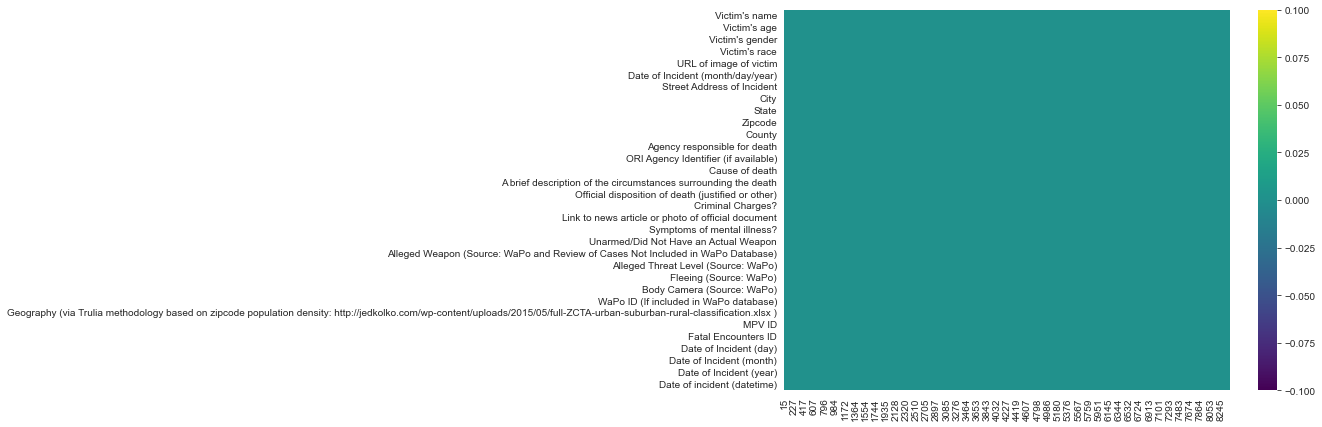

In [1218]:
plt.figure(figsize = (10, 7));
sns.heatmap(death_pol_killings_post_impute.isnull().transpose(), cmap = 'viridis');

### For dataset 3: Deaths while arresting , Dataframe_name: death_arrests ~ Naveen

### For dataset 4: Fatal Encounters, Dataframe_name: fatal_enc

In [1220]:
df = fatal_enc_post_EDA.copy(deep = True);

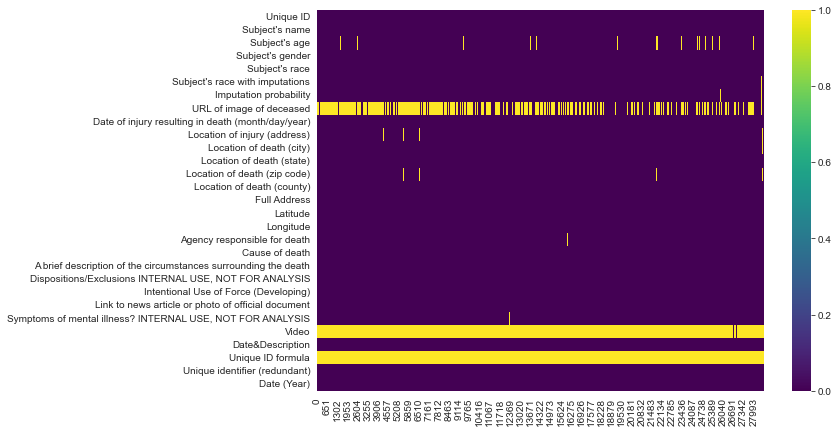

In [1221]:
plt.figure(figsize = (10, 7));
sns.heatmap(df.isnull().transpose(), cmap = 'viridis');

In [1222]:
df.isnull().sum()

Unique ID                                                             1
Subject's name                                                        0
Subject's age                                                      1014
Subject's gender                                                    101
Subject's race                                                        1
Subject's race with imputations                                     174
Imputation probability                                              183
URL of image of deceased                                          15492
Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                        542
Location of death (city)                                             36
Location of death (state)                                             1
Location of death (zip code)                                        190
Location of death (county)                                      

In [1225]:
df[df['Subject\'s name'] == 'Unknown']

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)


In [1233]:
# Checking for 'John Doe'; commonly used for unidentified bodies
df[df['Subject\'s name'].apply(lambda x : (x.split()[0][0] == 'J') and (x.split()[0][1] == 'o') and (x.split()[1][0] == 'D') and (x.split()[1][1] == 'o'))]

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
786,603.0,John Douglas Maher,39,Male,Race unspecified,European-American/White,0.984701884,NaN,11/23/2000,729 N.E. 10th St.,...,"According to police, John Douglas Maher was su...",Unreported,Intentional use of deadly force,https://groups.yahoo.com/neo/groups/stop-polab...,Yes,NaN,"11/23/2000: According to police, John Douglas ...",NaN,603.0,2000
2582,2050.0,"John Donald ""Donnie"" Stroman",61,Male,Race unspecified,African-American/Black,0.953634727,NaN,10/31/2002,SC-210 & I-26 & Vance Rd,...,"Donnie Stroman, 61, of Bowman, was killed Thur...",Criminal,Vehicle/Pursuit,http://www.wistv.com/story/5002883/santee-poli...,No,NaN,"10/31/2002: Donnie Stroman, 61, of Bowman, was...",NaN,2050.0,2002
4996,3996.0,Joel Don Casey,52,Male,European-American/White,European-American/White,Not imputed,https://fatalencounters.org/wp-content/uploads...,02/18/2005,4717 Meyerwood Dr,...,"Deputies James R. Cavitt, Gregory Young, Demon...",Grand jury/No bill or Cleared,Yes,http://www.houstontx.gov/police//nr/2005/feb/n...,Yes,NaN,"2/18/2005: Deputies James R. Cavitt, Gregory Y...",NaN,3996.0,2005
7323,20107.0,Joseph Donald Dum,52,Male,Race unspecified,European-American/White,0.985946379,NaN,01/13/2007,Heisley Lane,...,"In Perry County, state trooper shot James D. D...",Suicide,Suicide,https://docs.google.com/document/d/1wcyR0yjbrh...,No,NaN,"1/13/2007: In Perry County, state trooper shot...",NaN,20107.0,2007
7414,5884.0,John Douglas,27,Male,Race unspecified,European-American/White,0.905381384,NaN,02/07/2007,Redwood Rd & 4700 S,...,At 12:30 a.m. a local officer was speeding to ...,Criminal,Vehicle/Pursuit,http://www.deseretnews.com/article/705277896/-...,No,NaN,2/7/2007: At 12:30 a.m. a local officer was sp...,NaN,5884.0,2007
7956,6320.0,John Doe,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,07/09/2007,Loop 1604 and Interstate 10,...,Natalia and San Antonio Police Departments pur...,Unreported,Vehicle/Pursuit,https://drive.google.com/open?id=0B_YUrB_q0WyC...,No,NaN,7/9/2007: Natalia and San Antonio Police Depar...,NaN,6320.0,2007
7957,6321.0,John Doe,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,07/09/2007,Loop 1604 and Interstate 10,...,Natalia and San Antonio Police Departments pur...,Unreported,Vehicle/Pursuit,https://drive.google.com/open?id=0B_YUrB_q0WyC...,No,NaN,7/9/2007: Natalia and San Antonio Police Depar...,NaN,6321.0,2007
7958,6322.0,John Doe,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,07/09/2007,Loop 1604 and Interstate 10,...,Natalia and San Antonio Police Departments pur...,Unreported,Vehicle/Pursuit,https://drive.google.com/open?id=0B_YUrB_q0WyC...,No,NaN,7/9/2007: Natalia and San Antonio Police Depar...,NaN,6322.0,2007
11362,9019.0,Joshua Donahue,32,Male,Race unspecified,European-American/White,0.919689664,NaN,04/12/2010,Belcher Road and Drew Street,...,"A drunk driver, with a permanently revoked lic...",Unreported,Vehicle/Pursuit,http://archive.wtsp.com/news/topstories/story....,No,NaN,"4/12/2010: A drunk driver, with a permanently ...",NaN,9019.0,2010
13487,10743.0,Jordan Dodgen,22,Male,European-American/White,European-American/White,Not imputed,NaN,11/05/2011,SW 10th Ave. and SW MacVicar Ave.,...,Jordan Dodgen was killed when a truck fleeing ...,Unreported,Vehicle/Pursuit,http://m.pftopqad6.sms.morris.com/news/2012-01...,No,NaN,11/5/2011: Jordan Dodgen was killed when a tru...,NaN,10743.0,2011


In [1234]:
# Checking for 'John Doe'; commonly used for unidentified bodies
df[df['Subject\'s name'].apply(lambda x : (x.split()[0][0] == 'J') and (x.split()[0][1] == 'a') and (x.split()[1][0] == 'D') and (x.split()[1][1] == 'o'))]

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
117,20794.0,James Douglas,20,Male,European-American/White,European-American/White,Not imputed,https://www.fatalencounters.org/wp-content/upl...,02/17/2000,200 block West Clinton Street,...,Detective Larry Napp shot and killed James Dou...,Justified,Intentional use of deadly force,http://www.mlive.com/news/kalamazoo/index.ssf/...,No,NaN,2/17/2000: Detective Larry Napp shot and kille...,NaN,20794.0,2000
5811,4647.0,Jacky Don McGinnis,31,Male,Race unspecified,European-American/White,0.934051328,NaN,10/29/2005,606 Gail Drive,...,McGinnis committed suicide following four-hour...,Suicide,Suicide,https://docs.google.com/document/d/1sDydENaDMz...,Unknown,NaN,10/29/2005: McGinnis committed suicide followi...,NaN,4647.0,2005
9229,22715.0,Javon Donta Butts,19,Male,African-American/Black,African-American/Black,Not imputed,https://www.fatalencounters.org/wp-content/upl...,07/20/2008,2400 block Defense Road,...,"Javon Butts, 19, and passenger Donte Howlett, ...",Unreported,Vehicle/Pursuit,http://www.mydeathspace.com/article/2008/11/21...,No,NaN,"7/20/2008: Javon Butts, 19, and passenger Dont...",NaN,22715.0,2008
9809,7796.0,Jason Douglas Sorrell,23,Male,European-American/White,European-American/White,Not imputed,http://bloximages.chicago2.vip.townnews.com/ti...,01/17/2009,300 Carmel Creekside Dr,...,"At 1:50 a.m., deputies went to Sorrell's resid...",Grand jury/No bill or Cleared,Intentional use of deadly force,http://www.thehuttonews.com/editorial/article_...,Yes,NaN,"1/17/2009: At 1:50 a.m., deputies went to Sorr...",NaN,7796.0,2009
12899,10251.0,James Doe,31,Male,African-American/Black,African-American/Black,Not imputed,https://cbsmiami.files.wordpress.com/2011/06/j...,06/05/2011,210 Lake Pointe Drive,...,Doe (his correct name) fell into an argument w...,Unreported,Yes,http://miami.cbslocal.com/2011/06/06/bso-inves...,No,NaN,6/5/2011: Doe (his correct name) fell into an ...,NaN,10251.0,2011
14051,11206.0,Jane Doe,NaN,Female,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,04/10/2012,US 83 and Coyote Dr,...,Law enforcement pursued a white Chevrolet Taho...,Unreported,Vehicle/Pursuit,http://www.themonitor.com/news/local/dead-at-l...,No,NaN,4/10/2012: Law enforcement pursued a white Che...,NaN,11206.0,2012
14064,11217.0,Jane Doe1,NaN,Female,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,04/11/2012,4800 W Expy 83,...,Border Patrol agents stopped a minivan on U.S....,Unreported,Vehicle/Pursuit,http://www.chron.com/news/houston-texas/articl...,No,NaN,4/11/2012: Border Patrol agents stopped a mini...,NaN,11217.0,2012
14065,11218.0,Jane Doe 2,NaN,Female,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,04/11/2012,4800 W Expy 83,...,Border Patrol agents stopped a minivan on U.S....,Unreported,Vehicle/Pursuit,http://www.chron.com/news/houston-texas/articl...,No,NaN,4/11/2012: Border Patrol agents stopped a mini...,NaN,11218.0,2012
14066,11219.0,Jane Doe3,NaN,Female,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,04/11/2012,4800 W Expy 83,...,Border Patrol agents stopped a minivan on U.S....,Unreported,Vehicle/Pursuit,http://www.chron.com/news/houston-texas/articl...,No,NaN,4/11/2012: Border Patrol agents stopped a mini...,NaN,11219.0,2012
14300,11422.0,James Dortch Jr.,52,Male,European-American/White,European-American/White,Not imputed,NaN,06/12/2012,10000 block County Rd 67,...,"Dortch, high on bath salts, attacked his niece...",Unreported,Yes,http://www.click2houston.co

In [1236]:
df[df['Subject\'s name'] == 'John Doe']

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
7956,6320.0,John Doe,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,07/09/2007,Loop 1604 and Interstate 10,...,Natalia and San Antonio Police Departments pur...,Unreported,Vehicle/Pursuit,https://drive.google.com/open?id=0B_YUrB_q0WyC...,No,NaN,7/9/2007: Natalia and San Antonio Police Depar...,NaN,6320.0,2007
7957,6321.0,John Doe,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,07/09/2007,Loop 1604 and Interstate 10,...,Natalia and San Antonio Police Departments pur...,Unreported,Vehicle/Pursuit,https://drive.google.com/open?id=0B_YUrB_q0WyC...,No,NaN,7/9/2007: Natalia and San Antonio Police Depar...,NaN,6321.0,2007
7958,6322.0,John Doe,NaN,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,07/09/2007,Loop 1604 and Interstate 10,...,Natalia and San Antonio Police Departments pur...,Unreported,Vehicle/Pursuit,https://drive.google.com/open?id=0B_YUrB_q0WyC...,No,NaN,7/9/2007: Natalia and San Antonio Police Depar...,NaN,6322.0,2007
23446,23315.0,John Doe,NaN,Male,African-American/Black,African-American/Black,Not imputed,NaN,11/10/2017,Highway 22 and Tucker Lane,...,An Edwards Police Department officer shot and ...,Pending investigation,Intentional use of deadly force,http://www.clarionledger.com/story/news/local/...,No,NaN,11/10/2017: An Edwards Police Department offic...,NaN,23315.0,2017


In [1256]:
temp_index = df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'John') and (x.strip().split()[1] == 'Doe'))].index;

In [1246]:
for i in temp_index:
    df.loc[i, 'Subject\'s name'] = 'unknown';

In [1263]:
temp_index = df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'John') and (x.strip().split()[1][0] == 'D') and (x.strip().split()[1][1] == 'o') and (x.strip().split()[1][2] == 'e'))].index;

In [1264]:
for i in temp_index:
    df.loc[i, 'Subject\'s name'] = 'unknown';

In [1265]:
df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'John') and (x.strip().split()[1][0] == 'D') and (x.strip().split()[1][1] == 'o') and (x.strip().split()[1][2] == 'e'))]

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)


In [1252]:
temp_index = df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'Jane') and (x.strip().split()[1] == 'Doe'))].index

In [1253]:
for i in temp_index:
    df.loc[i, 'Subject\'s name'] = 'unknown';

In [1267]:
df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'Jane') and (x.strip().split()[1] == 'Doe'))]

In [1268]:
temp_index = df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'Jane') and (x.strip().split()[1][0] == 'D') and (x.strip().split()[1][1] == 'o') and (x.strip().split()[1][2] == 'e'))].index;

In [1269]:
for i in temp_index:
    df.loc[i, 'Subject\'s name'] = 'unknown';

In [1271]:
df[df['Subject\'s name'].apply(lambda x: (x.strip().split()[0] == 'Jane') and (x.strip().split()[1][0] == 'D') and (x.strip().split()[1][1] == 'o') and (x.strip().split()[1][2] == 'e'))]

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)


In [1290]:
df['Subject\'s age'].value_counts()

22           920
25           896
24           864
27           851
23           849
            ... 
8 months       1
18 months      1
7 months       1
9 months       1
70s            1
Name: Subject's age, Length: 118, dtype: int64

In [1308]:
df['Subject\'s age'].apply(lambda x: len(str(x).split())).value_counts()

1    28608
2       14
Name: Subject's age, dtype: int64

In [1310]:
df['Subject\'s age'].unique()

array(['17', '21', '19', '23', '24', '53', '30', '29', '55', '42', '41',
       '45', '20', '25', '22', '31', '36', '28', '35', nan, '26', '68',
       '16', '49', '27', '50', '44', '43', '38', '34', '32', '14', '15',
       '18', '33', '57', '1', '88', '37', '40', '85', '48', '56', '52',
       '46', '63', '74', '60', '59', '51', '69', '10', '13', '39', '47',
       '66', '79', '12', '11', '54', '65', '75', '20s', '6', '7', '5',
       '3', '72', '58', '71', '80', '78', '61', '73', '67', '70', '77',
       '76', '8', '9', '64', '62', '4', '83', '2', '89', '60s', '18-25',
       '18 months', '46/53', '3 months', '40s', '30s', '84', '90', '50s',
       '81', '87', '6 months', '9 months', '10 months', '86', '92',
       '2 months', '7 months', '82', '8 months', '91', '3 days', '55.',
       '20s-30s', '95', '101', '107', '40-50', '97', '93', '4 months',
       '70s'], dtype=object)

In [1337]:
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '18-25', value = 21);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '20s-30s', value = 25);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '40-50', value = 45);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '46/53', value = 49);

df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '20s', value = 25);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '40s', value = 45);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '30s', value = 35);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '50s', value = 55);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '60s', value = 65);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '70s', value = 75);


df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '3 days', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '2 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '3 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '4 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '6 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '7 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '8 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '9 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '10 months', value = 0);
df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '18 months', value = np.floor(18/12));

df['Subject\'s age'] = df['Subject\'s age'].replace(to_replace = '55.', value = 55);

In [1338]:
df['Subject\'s age'].unique()

array(['17', '21', '19', '23', '24', '53', '30', '29', '55', '42', '41',
       '45', '20', '25', '22', '31', '36', '28', '35', nan, '26', '68',
       '16', '49', '27', '50', '44', '43', '38', '34', '32', '14', '15',
       '18', '33', '57', '1', '88', '37', '40', '85', '48', '56', '52',
       '46', '63', '74', '60', '59', '51', '69', '10', '13', '39', '47',
       '66', '79', '12', '11', '54', '65', '75', 25, '6', '7', '5', '3',
       '72', '58', '71', '80', '78', '61', '73', '67', '70', '77', '76',
       '8', '9', '64', '62', '4', '83', '2', '89', 65, 21, 1.0, 49, 0, 45,
       35, '84', '90', 55, '81', '87', '86', '92', '82', '91', '95',
       '101', '107', '97', '93', 75], dtype=object)

In [1343]:
df['Subject\'s age'].dropna().apply(lambda x : int(x)).describe()

count    27608.000000
mean        35.174189
std         13.803013
min          0.000000
25%         25.000000
50%         33.000000
75%         44.000000
max        107.000000
Name: Subject's age, dtype: float64

<strong>NOTE:</strong> We can now see that there is a difference of 2 years between the standard deviation and the mean value. I feel like this is a margin wide enough to justify using the standard deviation in place of the mean to fix the data. Therefore, I am going to use the std value to replace the null values in the age column

In [1344]:
df['Subject\'s age'] = df['Subject\'s age'].fillna(33);

In [1347]:
df['Subject\'s age'] = df['Subject\'s age'].apply(lambda x : int(x)).describe();

In [1286]:
df.iloc[:, [2, 3, 4]].dropna().describe()

,Subject's age,Subject's gender,Subject's race
count,27595,27595,27595
unique,118,3,7
top,22,Male,European-American/White
freq,919,24924,9210


### For dataset 5: Washington Post Data, Dataframe_name: wash_post_shoot_stats ~ Yashwanth

## Data Visualizations

### For dataset 1: Police deaths. Dataframe_name: death_police 

In [1806]:
df = death_police_post_EDA.copy(deep = True);
df

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Cause of Death: Accidental,Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Cause of Death: Gunfire (Accidental),Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


In [1807]:
df.columns

Index(['person', 'dept', 'eow', 'cause', 'cause_short', 'date', 'year',
       'canine', 'dept_name', 'state'],
      dtype='object')

In [1808]:
df['eow_month'] = df['eow'].apply(lambda x: x.split()[2]);

In [1809]:
df['eow_year'] = df['eow'].apply(lambda x: int(x.split()[4]));

In [1810]:
df['eow_day'] = df['eow'].apply(lambda x: int(x.split()[3][:-1]));

In [1811]:
unique_order =  [1, 10, 5, 11, 12, 3, 8, 9, 2, 4, 6, 7];
month_filter = {'January' : 1, 'October' : 10, 'May': 5, 'November': 11, 'December': 12, 'March':3, 'August' : 8, 'September' : 9, 'February' : 2, 'April' : 11, 'June' : 6, 'July': 7}
#month_filter = dict(zip([df['eow_month'].unique()], unique_order));
#month_filter

In [1812]:
df['eow_month'] = df['eow_month'].apply(lambda x: month_filter[x]);

In [1813]:
df['eow_year']

0        1791
1        1791
2        1792
3        1794
4        1797
         ... 
22795    2016
22796    2016
22797    2016
22798    2016
22799    2016
Name: eow_year, Length: 22800, dtype: int64

In [1814]:
df['cause_short'].nunique()

36

In [1815]:
df['cause_short'].value_counts().index

Index(['Gunfire', 'Automobile accident', 'Motorcycle accident', 'Heart attack',
       'Vehicular assault', 'Struck by vehicle', 'Vehicle pursuit', 'Assault',
       'Gunfire (Accidental)', 'Stabbed', 'Aircraft accident', 'Drowned',
       'Struck by train', 'Fall', 'Duty related illness',
       '9/11 related illness', 'Terrorist attack', 'Electrocuted',
       'Animal related', 'Accidental', 'Struck by streetcar', 'Fire',
       'Heat exhaustion', 'Explosion', 'Bomb', 'Exposure to toxins',
       'Weather/Natural disaster', 'Training accident', 'Structure collapse',
       'Train accident', 'Exposure', 'Boating accident', 'Bicycle accident',
       'Unidentified', 'Poisoned', 'Asphyxiation'],
      dtype='object')

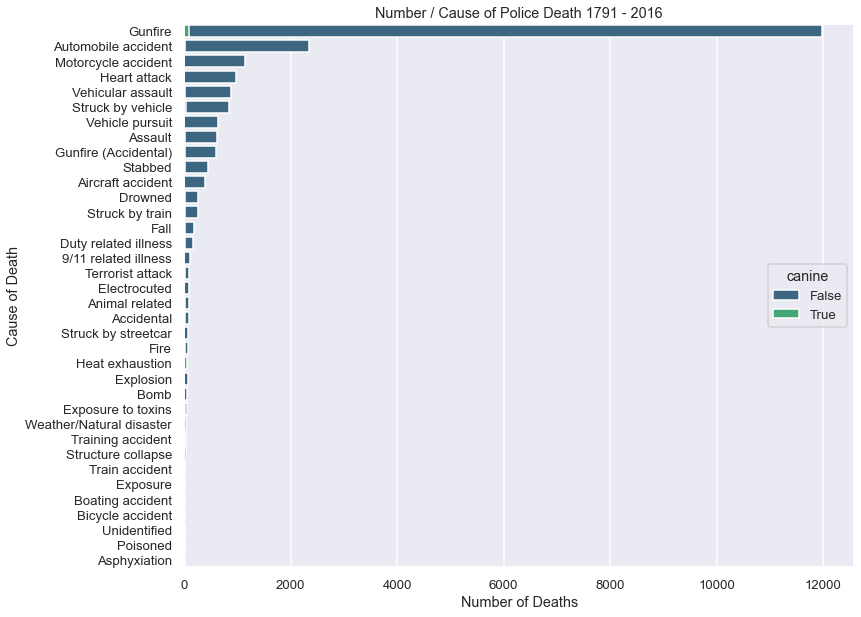

In [1816]:

sns.set_style('darkgrid');
sns.set_context('talk', font_scale= 0.8);
plt.figure(figsize = (12, 10));
plt.title('Number / Cause of Police Death 1791 - 2016')
plt.xlabel('Number of Deaths');
plt.ylabel('Cause of Death');
#police_death_cause = sns.barplot(y = df['cause_short'].value_counts().index, x = df['cause_short'].value_counts().values, palette= 'viridis')
police_death_cause = sns.countplot(y = df['cause_short'], palette= 'viridis', hue = df['canine'], dodge = False, order = df['cause_short'].value_counts().index)
plt.xlabel('Number of Deaths');
plt.ylabel('Cause of Death');
#plt.yticks(range(1, 37), df['cause_short'].value_counts().index, rotation = 0)
#sns.countplot(df['cause_short'])

In [1817]:
fig = police_death_cause.get_figure();
fig.savefig('police_death_causes.png');

In [1818]:
def create_date_obj_police_death(x):
    date_of_incident = [];
    for i in range(0, len(x)):
        #print ("index: ", i, "\n");
        #print ("day: ", x.iloc[i]['eow_day'], " month: ", x.iloc[i]['eow_month'], " year: ", x.iloc[i]['eow_year'], "\n");
        temp = datetime.date(day = x.iloc[i]['eow_day'], month = x.iloc[i]['eow_month'], year = x.iloc[i]['eow_year']);
        date_of_incident.append(temp);
    return date_of_incident;

In [1819]:
df['eow_datetime'] = create_date_obj_police_death(df)

In [1820]:
df['eow_year'].describe()

count    22800.000000
mean      1951.751272
std         38.233234
min       1791.000000
25%       1924.000000
50%       1952.000000
75%       1983.000000
max       2016.000000
Name: eow_year, dtype: float64

In [1821]:
df_recent = df[df['eow_datetime'] > datetime.date(2010, 1, 1)];
df_recent['eow_year'].describe()

count    1071.000000
mean     2012.644258
std         1.909999
min      2010.000000
25%      2011.000000
50%      2013.000000
75%      2014.000000
max      2016.000000
Name: eow_year, dtype: float64

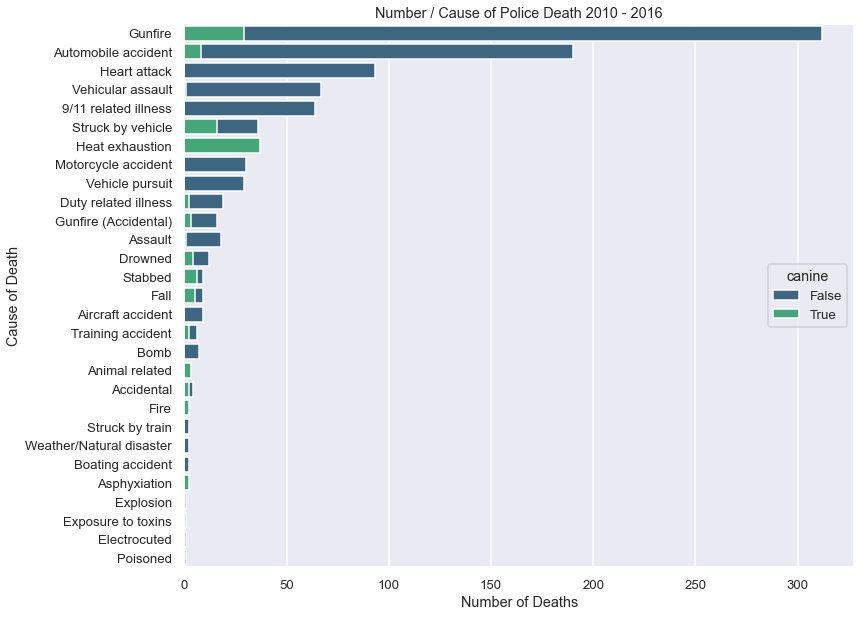

In [1826]:

sns.set_style('darkgrid');
sns.set_context('talk', font_scale= 0.8);
plt.figure(figsize = (12, 10));
plt.title('Number / Cause of Police Death 2010 - 2016')
plt.xlabel('Number of Deaths');
plt.ylabel('Cause of Death');
#police_death_cause = sns.barplot(y = df['cause_short'].value_counts().index, x = df['cause_short'].value_counts().values, palette= 'viridis')
police_recent_death_cause = sns.countplot(y = df_recent['cause_short'], palette= 'viridis', hue = df_recent['canine'], dodge = False, order = df_recent['cause_short'].value_counts().index)
plt.xlabel('Number of Deaths');
plt.ylabel('Cause of Death');
#plt.yticks(range(1, 37), df['cause_short'].value_counts().index, rotation = 0)
#sns.countplot(df['cause_short'])

In [1825]:
fig = police_recent_death_cause.get_figure();
fig.savefig('police_recent_death_causes.png');

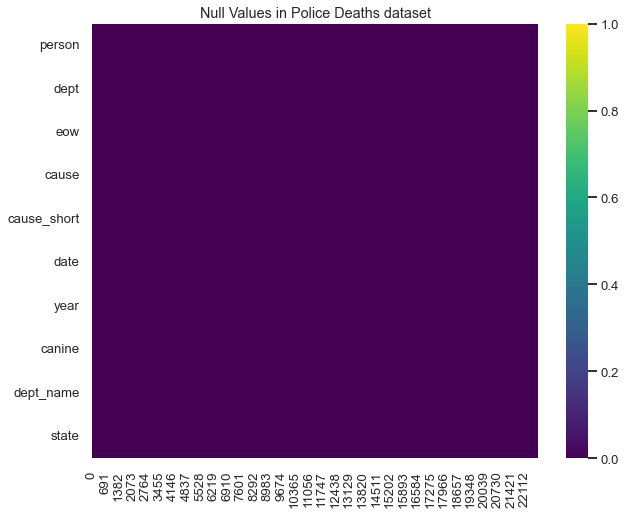

In [1692]:
plt.figure(figsize = (10, 8));
plt.title('Null Values in Police Deaths dataset');
nulls_death_pol = sns.heatmap(death_police_post_EDA.isnull().transpose(), cmap = 'viridis', vmin = 0.00, vmax = 1.00);

In [1693]:
fig = nulls_death_pol.get_figure();
fig.savefig('police_death_null_vals_post_EDA.png');

### For dataset 2: Police Killings, Dataframe_name: death_pol_killings

In [1828]:
df = death_pol_killings_post_impute.copy(deep = True);
df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Date of Incident (day),Date of Incident (month),Date of Incident (year),Date of incident (datetime)
15,Nikolas Frazier,26,Male,White,Unknown,30/08/2020,1185 Herndon Ave,Clovis,CA,93612.0,...,not fleeing,yes,6119.0,Suburban,8433,28701.0,30,8,2020,2020-08-30
17,Name withheld by police,43,Male,Black,Unknown,29/08/2020,400 Yorkshire Boulevard,Dearborn Heights,MI,48127.0,...,not fleeing,no,6127.0,Suburban,8432,28696.0,29,8,2020,2020-08-29
18,Michael Anthony Harris,44,Male,Black,Unknown,29/08/2020,1638 Espanola Avenue,Daytona Beach,FL,32117.0,...,not fleeing,yes,6120.0,Suburban,8431,28695.0,29,8,2020,2020-08-29
19,Kurt Phelps,37,Male,Unknown race,Unknown,29/08/2020,1200 M 3/4 Road,Loma,CO,81524.0,...,not fleeing,no,6118.0,Rural,8430,28697.0,29,8,2020,2020-08-29
20,Julio Cesar Moran-Ruiz,36,Male,Hispanic,Unknown,28/08/2020,I-95 and MD-100,Elkridge,MD,21075.0,...,car,no,6112.0,Suburban,8429,28690.0,28,8,2020,2020-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,01/01/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,unknown,no,0.0,Suburban,4,12176.0,1,1,2013,2013-01-01
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,01/01/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,unknown,no,0.0,Urban,3,12174.0,1,1,2013,2013-01-01
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,01/01/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,unknown,no,0.0,Urban,2,12173.0,1,1,2013,2013-01-01
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,01/01/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,unknown,no,0.0,Urban,1,12175.0,1,1,2013,2013-01-01


In [1829]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-Z

In [1830]:
#len(df[df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] == 'Suburban'])
num_suburban_killings = len(df[df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] == 'Suburban']);
num_urban_killings = len(df[df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] == 'Urban']);
num_rural_killings = len(df[df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] == 'Rural']);
num_undetermined_killings = len(df[df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] == 'Undetermined']);
total_num = int(len(df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )']));
percentage_subur = (num_suburban_killings / total_num) * 100;
percentage_ur = (num_urban_killings / total_num) * 100;
percentage_rur = (num_rural_killings / total_num) * 100;
percentage_undet = (num_undetermined_killings / total_num) * 100;
str1 = 'Suburban '+ str(percentage_subur)[:-12] +'%';
str2 = 'Urban ' + str(percentage_ur)[:-12] + '%';
str3 = 'Rural ' + str(percentage_rur)[:-12] + '%';
str4 = 'Undetermined ' + str(percentage_undet)[:-12] + '%';


C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



([<matplotlib.axis.XTick at 0x21cb02e9940>,
 [Text(0, 0, 'Suburban 50.32%'),
  Text(1, 0, 'Urban 27.287%'),
  Text(2, 0, 'Rural 21.982%'),
  Text(3, 0, 'Undetermined 0.40145%')])

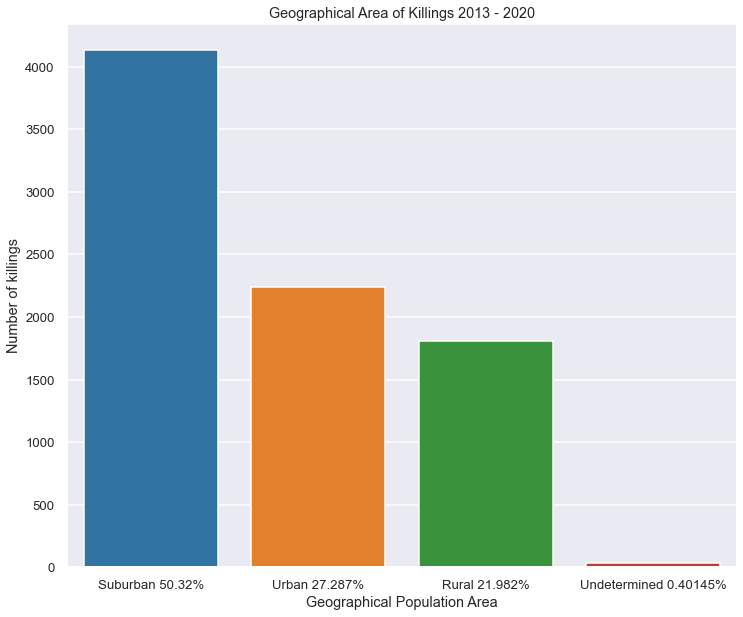

In [1832]:
plt.figure(figsize = (12, 10));
plt.xlabel ('Geographical Population Area');
plt.ylabel ('Number of Police killings');
plt.title('Geographical Area of Killings 2013 - 2020');
geog_plot = sns.countplot(df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'], order = df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'].value_counts().index)
plt.ylabel ('Number of killings');
plt.xlabel ('Geographical Population Area');
plt.xticks ([0, 1, 2, 3], [str1, str2, str3, str4])

In [1833]:
fig = geog_plot.get_figure();
fig.savefig('geog_deaths.png');

In [1834]:
#len(df[df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'] == 'Suburban'])
num_white_killings = len(df[df['Victim\'s race'] == 'White']);
num_black_killings = len(df[df['Victim\'s race'] == 'Black']);
num_unknown_killings = len(df[df['Victim\'s race'] == 'Unknown race']);
num_tribe_killings = len(df[df['Victim\'s race'] == 'Native American']);
num_his_killings = len(df[df['Victim\'s race'] == 'Hispanic']);
num_asian_killings = len(df[df['Victim\'s race'] == 'Asian']);
num_pi_killings = len(df[df['Victim\'s race'] == 'Pacific Islander']);

total_num = int(len(df['Victim\'s race']));
percentage_white = (num_white_killings / total_num) * 100;
percentage_black = (num_black_killings / total_num) * 100;
percentage_unknown = (num_unknown_killings / total_num) * 100;
percentage_tribe = (num_tribe_killings / total_num) * 100;
percentage_his = (num_his_killings / total_num) * 100;
percentage_asian = (num_asian_killings / total_num) * 100;
percentage_pi = (num_pi_killings / total_num) * 100;


str1 = 'White \n'+ str(percentage_white)[:-12] +'%';
str2 = 'Black \n' + str(percentage_black)[:-12] + '%';
str3 = 'Unknown \n' + str(percentage_unknown)[:-12] + '%';
str4 = 'Native American \n' + str(percentage_tribe)[:-12] + '%';
str5 = 'Hispanic \n' + str(percentage_his)[:-12] + '%';
str6 = 'Asian \n' + str(percentage_asian)[:-12] + '%';
str7 = 'Pacific Islander \n' + str(percentage_pi)[:-12] + '%';
num_unknown_killings

797

In [1835]:
df['Geography_data'] = df['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'];
df = df.drop(columns = ['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )']);


C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



([<matplotlib.axis.XTick at 0x21cae19f130>,
 [Text(0, 0, 'White \n44.16%'),
  Text(1, 0, 'Black \n25.437%'),
  Text(2, 0, 'Hispanic \n17.311%'),
  Text(3, 0, 'Unknown \n9.695%'),
  Text(4, 0, 'Asian \n1.5450%'),
  Text(5, 0, 'Native American \n1.289%'),
  Text(6, 0, 'Pacific Islander \n0.559%')])

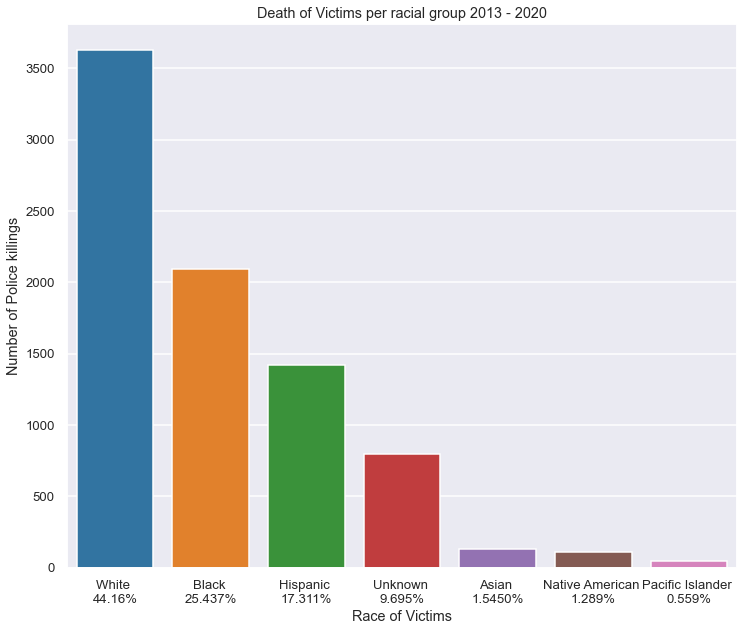

In [1836]:
plt.figure(figsize = (12, 10));
plt.xlabel ('Race of Victims');
plt.ylabel ('Number of Police killings');
plt.title('Death of Victims per racial group 2013 - 2020');
plt.xlabel ('Race of Victims');
plt.ylabel ('Number of Police killings');

race_of_victims = sns.countplot(df['Victim\'s race'], order = df['Victim\'s race'].value_counts().index);
plt.xlabel ('Race of Victims');
plt.ylabel ('Number of Police killings');
plt.xticks ([0, 1, 2, 3, 4, 5, 6], [str1, str2, str5, str3, str6, str4, str7])

In [1802]:
fig = race_of_victims.get_figure();
fig.savefig('race_of_victims_plot.png');

In [1628]:
df['State'].value_counts()

CA    1270
TX     753
FL     594
AZ     367
GA     286
CO     258
WA     234
NC     228
OH     227
OK     226
MO     218
TN     195
IL     186
PA     179
NY     171
LA     162
NM     150
AL     147
NV     142
MD     136
IN     135
VA     133
KY     131
MI     129
SC     128
WI     122
OR     121
AR     113
NJ     112
MS     112
UT      90
MN      89
KS      75
WV      68
MA      57
ID      51
IA      48
MT      44
AK      44
CT      40
NE      39
HI      38
ME      34
DC      26
SD      22
WY      22
DE      21
NH      17
ND      12
VT      12
RI       6
Name: State, dtype: int64

In [1629]:
import plotly.graph_objs as go 

In [1626]:
data1 = dict(type = 'choropleth',
            locationmode = 'USA-states',
            locations = df['State'].value_counts().index,
            z = df['State'].value_counts().values,
            colorbar = {'title': 'number of Deaths'});

In [1636]:
layout1 = dict(title = 'Number of deaths per state 2013 - 2020',
             geo = dict(scope= 'usa', showlakes = True, lakecolor = 'rgb(85, 173, 240)'));

In [1637]:
choromap = go.Figure(data = [data1],layout = layout1)
iplot(choromap,validate=False)

In [1634]:
#fig = choromap.get_subplot;
#fig.savefig('Victims_per_state.png');


In [1635]:
df['Date of Incident (year)'].describe()

count    8220.000000
mean     2016.384307
std         2.222970
min      2013.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: Date of Incident (year), dtype: float64

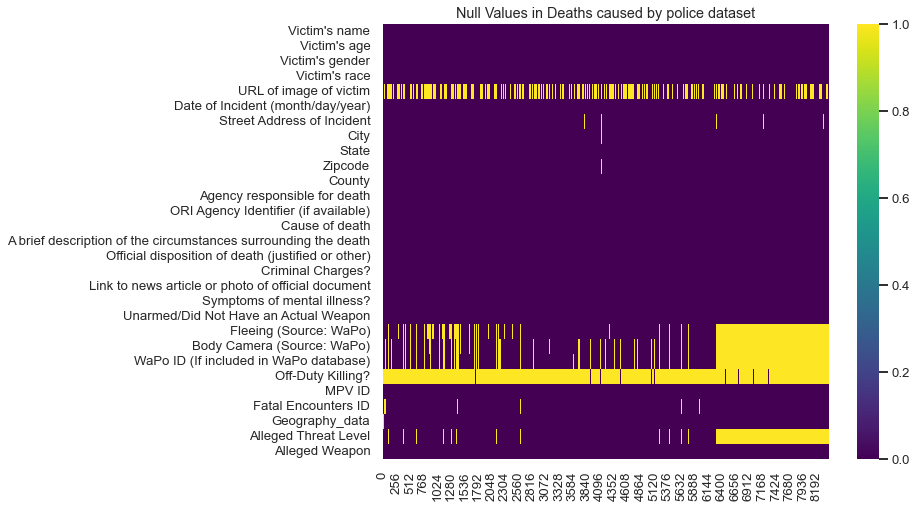

In [1681]:
#death_pol_killings_post_EDA['Geography_data'] = death_pol_killings_post_EDA['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )'];
#death_pol_killings_post_EDA = death_pol_killings_post_EDA.drop(columns = ['Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )']);
#death_pol_killings_post_EDA['Alleged Threat Level'] = death_pol_killings_post_EDA['Alleged Threat Level (Source: WaPo)'];
#death_pol_killings_post_EDA = death_pol_killings_post_EDA.drop(columns = ['Alleged Threat Level (Source: WaPo)']);
#death_pol_killings_post_EDA['Alleged Weapon'] = death_pol_killings_post_EDA['Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)'];
#death_pol_killings_post_EDA = death_pol_killings_post_EDA.drop(columns = ['Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)']);

plt.figure(figsize = (10, 8))
plt.title('Null Values in Deaths caused by police dataset');
nulls_death_pol_killings_post_EDA = sns.heatmap(death_pol_killings_post_EDA.isnull().transpose(), cmap = 'viridis');


In [1683]:
fig = nulls_death_pol_killings_post_EDA.get_figure();
fig.savefig('death_pol_killings_null_vals_post_EDA.png')

C:\Users\Shahbaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



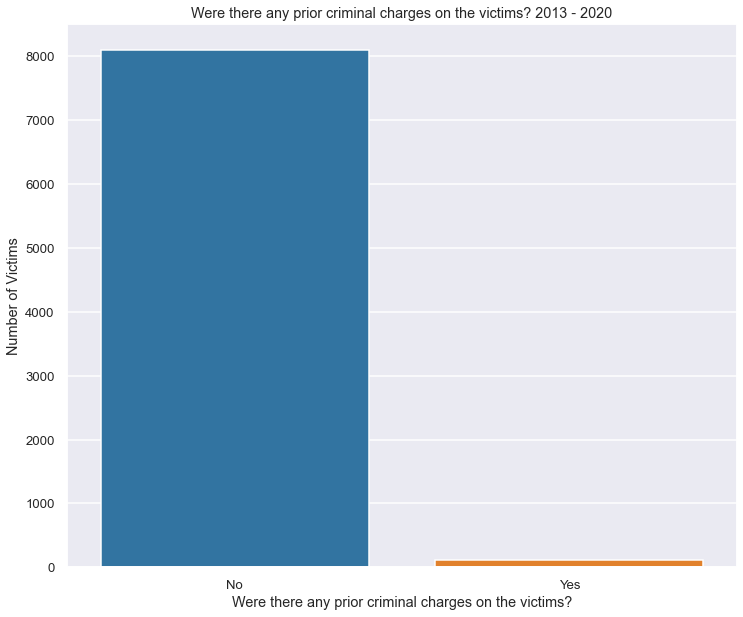

In [1838]:
plt.figure(figsize = (12, 10));
crim_charges = sns.countplot(df['Criminal Charges?'].apply(lambda x: (x.split()[0] == 'Charged') or (x.split()[0] == 'Charged,')))

plt.xlabel ('Were there any prior criminal charges on the victims?');
plt.ylabel ('Number of Victims');
plt.title('Were there any prior criminal charges on the victims? 2013 - 2020');
plt.xticks([0, 1], ['No', 'Yes']);

In [1839]:
fig = crim_charges.get_figure();
fig.savefig('victim_crim_priors.png');

In [1759]:
#df['Criminal Charges?'].value_counts()
df['Victim\'s age'].iplot(kind = '')

PlotlyEmptyDataError: Empty data list found. Make sure that you populated the list of data objects you're sending and try again.
Questions? Visit support.plot.ly

In [ ]:
# Body Cameras available?

In [ ]:
# URL Image of Victim

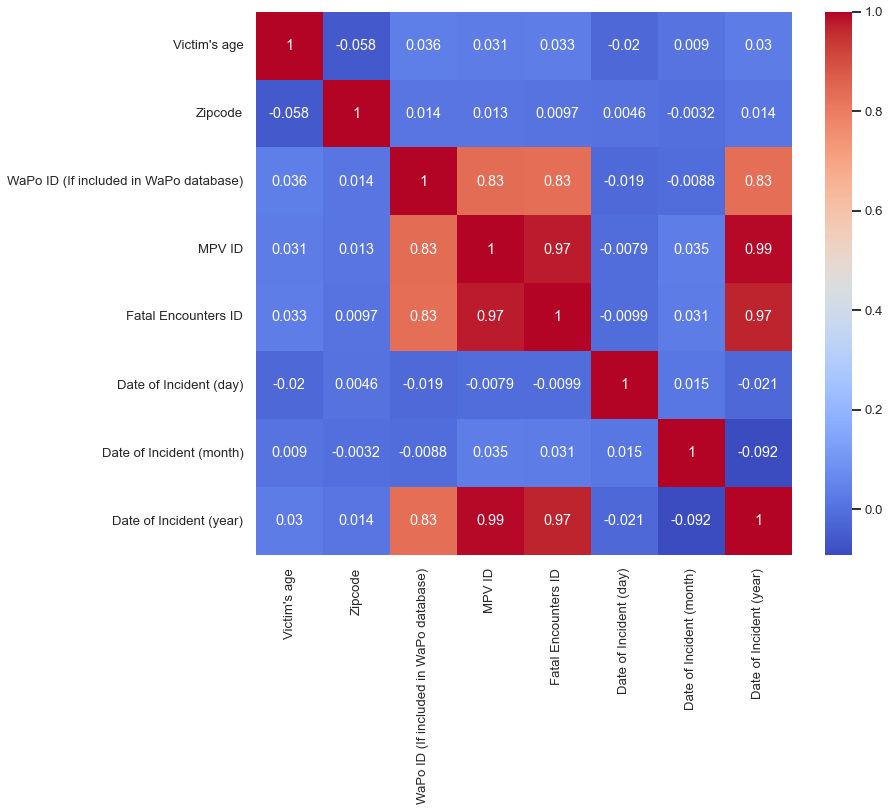

In [1840]:
plt.figure(figsize= (12, 10))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm');

### For dataset 3: Deaths while arresting , Dataframe_name: death_arrests ~ Naveen

### For dataset 4: Fatal Encounters, Dataframe_name: fatal_enc ~ Yashwanth

### For dataset 5: Washington Post Data, Dataframe_name: wash_post_shoot_stats ~ Yashwanth

# Decision Trees for dataset 2: Police Killings, Dataframe_name: death_pol_killings

In [1848]:
df = death_pol_killings_post_impute.copy(deep = True);
df

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID,Date of Incident (day),Date of Incident (month),Date of Incident (year),Date of incident (datetime)
15,Nikolas Frazier,26,Male,White,Unknown,30/08/2020,1185 Herndon Ave,Clovis,CA,93612.0,...,not fleeing,yes,6119.0,Suburban,8433,28701.0,30,8,2020,2020-08-30
17,Name withheld by police,43,Male,Black,Unknown,29/08/2020,400 Yorkshire Boulevard,Dearborn Heights,MI,48127.0,...,not fleeing,no,6127.0,Suburban,8432,28696.0,29,8,2020,2020-08-29
18,Michael Anthony Harris,44,Male,Black,Unknown,29/08/2020,1638 Espanola Avenue,Daytona Beach,FL,32117.0,...,not fleeing,yes,6120.0,Suburban,8431,28695.0,29,8,2020,2020-08-29
19,Kurt Phelps,37,Male,Unknown race,Unknown,29/08/2020,1200 M 3/4 Road,Loma,CO,81524.0,...,not fleeing,no,6118.0,Rural,8430,28697.0,29,8,2020,2020-08-29
20,Julio Cesar Moran-Ruiz,36,Male,Hispanic,Unknown,28/08/2020,I-95 and MD-100,Elkridge,MD,21075.0,...,car,no,6112.0,Suburban,8429,28690.0,28,8,2020,2020-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,01/01/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,unknown,no,0.0,Suburban,4,12176.0,1,1,2013,2013-01-01
8423,Abel Gurrola,26,Male,Hispanic,http://www.bakersfieldnow.com/news/local/A-26-...,01/01/2013,720 Terrace Way,Bakersfield,CA,93304.0,...,unknown,no,0.0,Urban,3,12174.0,1,1,2013,2013-01-01
8424,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,01/01/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,unknown,no,0.0,Urban,2,12173.0,1,1,2013,2013-01-01
8425,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,01/01/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,unknown,no,0.0,Urban,1,12175.0,1,1,2013,2013-01-01


In [1849]:
df = df.drop(columns = ['Victim\'s name', 'URL of image of victim', 'Date of incident (datetime)', 'Date of Incident (day)', 'Date of Incident (month)', 'Date of Incident (year)']);

In [1850]:
df = df.drop(columns = ['Street Address of Incident', 'City', 'Zipcode', 'County', 'Agency responsible for death', 'Symptoms of mental illness?', 'MPV ID', 'Fatal Encounters ID']);

In [1851]:
df = df.drop(columns = ['ORI Agency Identifier (if available)', 'A brief description of the circumstances surrounding the death', 'Link to news article or photo of official document']);

In [1852]:
df = df.drop(columns = ['WaPo ID (If included in WaPo database)', 'Date of Incident (month/day/year)']);

In [1853]:
df = df.drop(columns = ['Body Camera (Source: WaPo)']);

In [1854]:
for i in df.columns:
    print(df[i].value_counts());

37     458
25     271
31     267
32     258
28     257
      ... 
10       1
95       1
93       1
7        1
107      1
Name: Victim's age, Length: 85, dtype: int64
Male           7794
Female          413
Transgender       9
Unknown           4
Name: Victim's gender, dtype: int64
White               3630
Black               2091
Hispanic            1423
Unknown race         797
Asian                127
Native American      106
Pacific Islander      46
Name: Victim's race, dtype: int64
CA    1270
TX     753
FL     594
AZ     367
GA     286
CO     258
WA     234
NC     228
OH     227
OK     226
MO     218
TN     195
IL     186
PA     179
NY     171
LA     162
NM     150
AL     147
NV     142
MD     136
IN     135
VA     133
KY     131
MI     129
SC     128
WI     122
OR     121
AR     113
NJ     112
MS     112
UT      90
MN      89
KS      75
WV      68
MA      57
ID      51
IA      48
MT      44
AK      44
CT      40
NE      39
HI      38
ME      34
DC      26
SD      22
WY      22
DE 

In [1855]:
df_alleged_weapon = pd.get_dummies(df['Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)']);
df_alleged_weapon

,Airsoft pistol,Ax,BB gun,BB gun and vehicle,Hammer,Pole,Scissors,Stapler,Taser,air conditioner and glass bottle,...,vehicle,vehicle and gun,vehicle and machete,walking stick,wasp spray,windshield wiper,wood stick,wooden nightstand,wooden stick,wrench
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
